# **Machine Learning: AllLife Bank Personal Loan Campaign**

## <a name="TOC">Table of contents</a>


1. [Problem Statement and Objective](#pstatement)
2. [Imported Libraries](#libraries)
3. [Data Overview and Analysis](#dataview)
4. [EDA](#EDA)
  1.  [Univariate Insights](#uni)
  2.  [EDA Visualizations](#edav)
  3.  [Bivariate Analysis](#bia)
5. [Data Processing](#dataprocess)
  1.  [Feature Engineering](#feng)
  2.  [Outlier Detection](#od)
6. [Model Building](#mbuilding)
  1.  [Model Evaluation and Criteria](#evalandcrit)
      1.  [Variable Preparation](#varprep)
  2.  [Full Decision Tree](#fulltree)
      1.  [Training Metrics](#ft_trainmet)
      2.  [Test Metrics](#ft_testmet)
      3.  [Tree Visualization and Rules](#fullvisuals)
      4.  [Feature Importance](#fullFeature)
      5.  [Analysis and Observations](#fullanalysis)
  3.  [Pre Prunned Decision Tree - Hyperparameter Tuning](#preprune)
      1.  [Training Metrics](#pretreemet)
      2.  [Test Metrics](#pretestmet)
      3.  [Tree Visualization and Rules](#previsuals)
      4.  [Feature Importance](#preimportance)
      5.  [Analysis and Observations](#preanalysis)
  4.  [Post Pruning - Cost Complexity Pruning](#postprunning)
      1.  [Impurity vs Alpha Visualizations](#impvisual)
      2.  [Best Model Selection](#bestmodel)
      3.  [Training Metrics](#prunedtrainmet)
      4.  [Test Metrics](#prunedtestmet)
      5.  [Tree Visualization and Rules](#prunedvisuals)
      6.  [Feature Importance](#prunfeature)
      7.  [Analysis and Observations](#prunedanay)
  5.  [Model Comparison and Final Model Selection](#compare)
      1.  [Model Metric Comparisons (Test Data)](#metriccompare)

7.  [Actionable Insights and Business Recommendations](#insightrec)
8.  [Appendix](#appen)
  1.  [Zip code evaluation with uszipcode package](#zipeval)
  2.  [Full Decision Tree Model Visualization](#dTree)
  3.  [Hyperparameter Tuning Decision Tree Model Visualization](#hyperTree)
  4.  [Cost Complexity Pruning Decision Tree Model Visualization](#custcomplextree)
  5.  [Additional Models](#other)
      1.  [Full Decision Tree with weights](#weights)

## <a name="pstatement">Problem Statement</a>  
[Back to TOC](#TOC)

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

[Back to TOC](#TOC)

## <a name="libraries">Importing necessary libraries</a>

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
!pip install sqlalchemy-mate==1.4.28.3
!pip install uszipcode

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split


# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix,
)

# To ignore unnecessary warnings
import warnings

warnings.filterwarnings("ignore")

# Command to tell Python to actually display the graphs
%matplotlib inline

# To supress numerical display in scientific notations
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from google.colab import data_table

# To show dataframes in sortable table
data_table.enable_dataframe_formatter()

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)


from uszipcode import SearchEngine

In [ ]:
# Connect to Google Drive
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import <a id='globalnotebook'>notebook</a> with global functions:  

In [ ]:
# Import global functions notebook to reduce clutter
%run "/content/drive/MyDrive/AIClass/Machine Learning/linreg.ipynb"

## Loading the dataset

In [ ]:
# Loading the Loan Modeling dataset
df = pd.read_csv("/content/drive/MyDrive/AIClass/Machine Learning/Loan_Modelling.csv")

In [ ]:
# create a copy of the original dataframe
dfmodel = df.copy()

[Back to TOC](#TOC)

## <a name="dataview">Data Overview</a>

*  Observations
      *   The dataset consists of 5000 rows and 14 numerical columns
      *   There are no missing values, but data validation is necessary to ensure all values are legitimate within their respective domains.
      *   The dataset contains no duplicate entries.
      *   Several columns (Education, Personal Loan, etc.) appear to be categorical despite being numerical. These will likely require conversion for modeling purposes.
      *   The Experience column has negative values, which requires investigation as experience should be positive.
      *   Descriptive statistics for financial data (income, credit card average, mortgage) seem reasonable within their ranges. However, a discrepancy between the median and mean of mortgage amounts suggests potential outliers or a skewed distribution.

*  Sanity Checks
      *   The ID column, containing only unique values, can be dropped as it won't contribute to the model.
      *   The Zip Code data requires further evaluation to determine its usefulness for the analysis.

#### Data Analysis

In [ ]:
# call getDataInfo(dataframe) function to list data info and stats (function is in linreg.ipynb notebook)
getDataInfo(dfmodel)

**Data Shape**

There are 5000 rows and 14 columns.



**Data Info**

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: 

**Duplicate Rows**

There are 0 duplicate rows.



**Data Stats**

,count,mean,std,min,25%,50%,75%,max
ID,5000.00,2500.50,1443.52,1.00,1250.75,2500.50,3750.25,5000.00
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIPCode,5000.00,93169.26,1759.46,90005.00,91911.00,93437.00,94608.00,96651.00
Family,5000.00,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,5000.00,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal_Loan,5000.00,0.10,0.29,0.00,0.00,0.00,0.00,1.00


**Null Count**

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Univariate Counts, Unique, and NaN**

----------------------------------------------------------------------------------------------------


**ID Unique**

There are 5000 unique values.


**ID NaN Count**

0

**Age Unique**

There are 45 unique values.


**Age NaN Count**

0

**Experience Unique**

There are 47 unique values.


**Experience NaN Count**

0

**Income Unique**

There are 162 unique values.


**Income NaN Count**

0

**ZIPCode Unique**

There are 467 unique values.


**ZIPCode NaN Count**

0

**Family Unique**

There are 4 unique values.


array([4, 3, 1, 2])

**Family NaN Count**

0

**CCAvg Unique**

There are 108 unique values.


**CCAvg NaN Count**

0

**Education Unique**

There are 3 unique values.


array([1, 2, 3])

**Education NaN Count**

0

**Mortgage Unique**

There are 347 unique values.


**Mortgage NaN Count**

0

**Personal_Loan Unique**

There are 2 unique values.


array([0, 1])

**Personal_Loan NaN Count**

0

**Securities_Account Unique**

There are 2 unique values.


array([1, 0])

**Securities_Account NaN Count**

0

**CD_Account Unique**

There are 2 unique values.


array([0, 1])

**CD_Account NaN Count**

0

**Online Unique**

There are 2 unique values.


array([0, 1])

**Online NaN Count**

0

**CreditCard Unique**

There are 2 unique values.


array([0, 1])

**CreditCard NaN Count**

0

In [ ]:
# Getting number of duplicate rows in dfmodel
dfmodel.duplicated().sum()

0

In [ ]:
# Convert Personal_Loan, Securities_Account, Education, CreditCard, Online and CD_Account to type category

dfmodel["Personal_Loan"] = dfmodel["Personal_Loan"].astype("category")
dfmodel["Securities_Account"] = dfmodel["Securities_Account"].astype("category")
dfmodel["Education"] = dfmodel["Education"].astype("category")
dfmodel["Online"] = dfmodel["Online"].astype("category")
dfmodel["CD_Account"] = dfmodel["CD_Account"].astype("category")
dfmodel["CreditCard"] = dfmodel["CreditCard"].astype("category")

In [ ]:
dfmodel["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
# Return values that are less than 0 for Experience Column
dfmodel[dfmodel["Experience"] < 0]["Experience"].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

In [ ]:
# experience column replace the negative numbers with positive ones

dfmodel["Experience"] = dfmodel["Experience"].apply(lambda x: abs(x))

In [ ]:
dfmodel[dfmodel["Experience"] < 0]["Experience"].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
dfmodel["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [ ]:
#  lowest value in Mortage column that is greater than 0

dfmodel["Mortgage"].where(dfmodel["Mortgage"] > 0).min()

75.0

In [ ]:
# drop ID column because all values are unique, indicating it is a key

dfmodel.drop("ID", axis=1, inplace=True)

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

## <a name="EDA">Exploratory Data Analysis EDA Summary</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**Answers:**

1.  There are no mortgages below 75k. This could be due to loan minimums set by lenders or a bias in the data towards a specific market segment.  The mortgage distribution is right skewed, with most values on the lower end and some outliers in the higher range.

2. A significant portion (29.4%) of customers use credit cards from other banks.  Nearly all customers (97.88%) have a credit card balance. The average balance is 1.9k.
  

3.  Income has the strongest positive correlation (0.5) with personal loans, indicating that people with higher income are more likely to take out loans. Credit card average (CCAvg) and CD account indicators have weaker positive correlations (0.37 and 0.32) with personal loans, suggesting a possible connection between access to credit and loan purchases, but not as strong as income.

4.  The median age for both loan purchasers and non-purchasers is around 45. However, the loan purchaser age range (35-66) is slightly narrower than non-purchasers (32-68).

5.  Customers with higher education levels (2 and 3) have a higher loan purchase rate compared to those with lower education (level 1).

### <a name="uni">Univariate Insights</a>

*  CCAvg is right skewed, with most values on the lower end and some outliers on the higher range.  
*  Mortgage is right skewed, however mortgages values start at 75K.  There are several outliers in the higher range. The mean mortgage is 56K and the highest mortgage values is 635K.  
*  Income is right skewed, with some outliers in the higher range.  
*  The age distribution is normal, with data points centered around the average and tapering off towards the extremes.
*  The experience data appears to be uniformly distributed with spikes throughout, potentially indicating different experience categories or specializations. Some higher-end experience values are also be present.
*  Majority of customer have Education level of 1.
*  6% of customers have a CD Account with the bank.
*  10.5% have Scurities account with the bank.
*  The majority of customers access their account online (%59.7)
*  29.4% of customers have a credit card.

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

#### <a name="edav">EDA Visualizations</a>

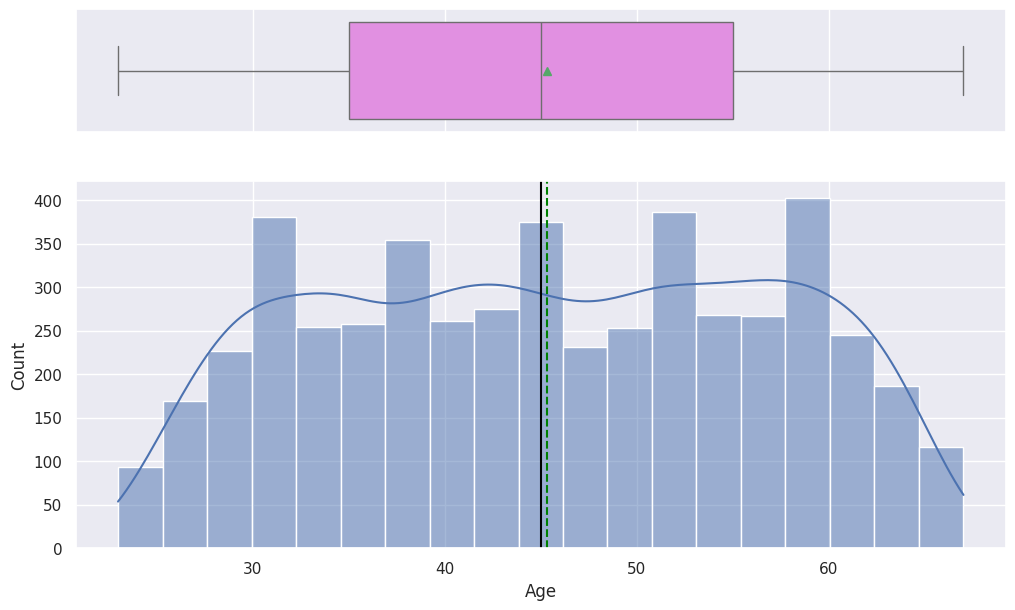

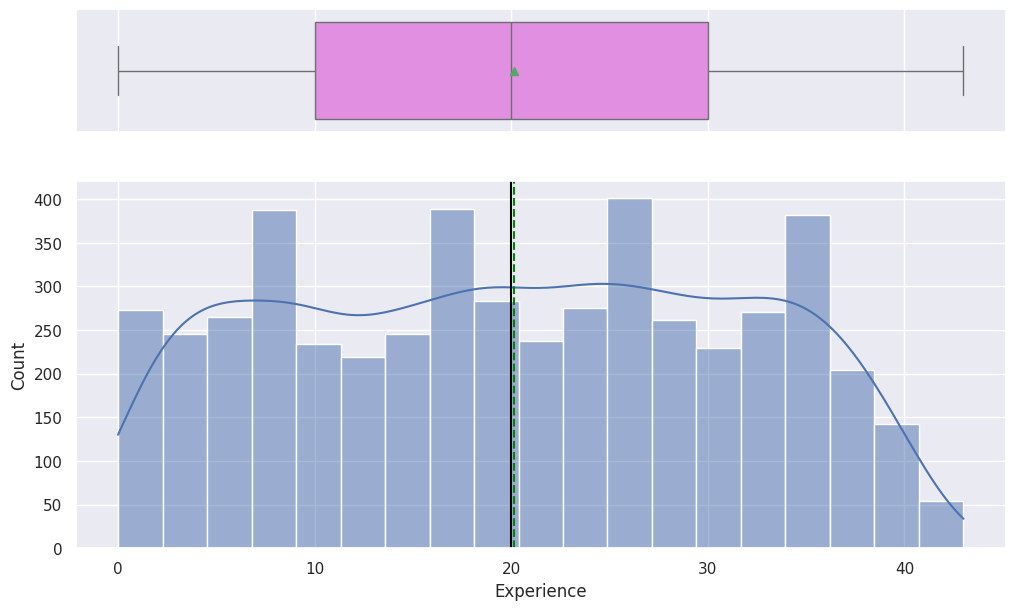

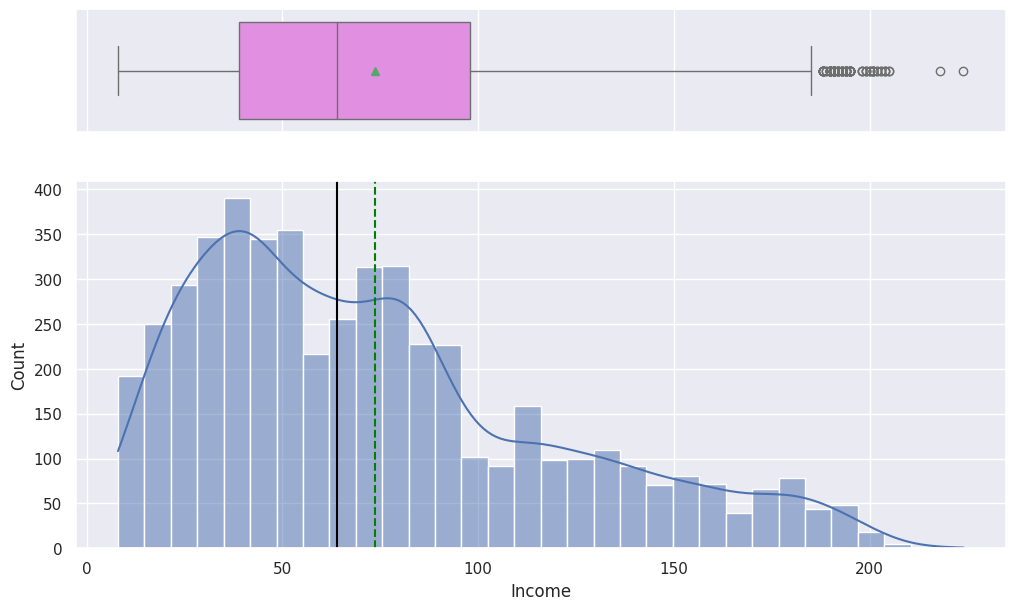

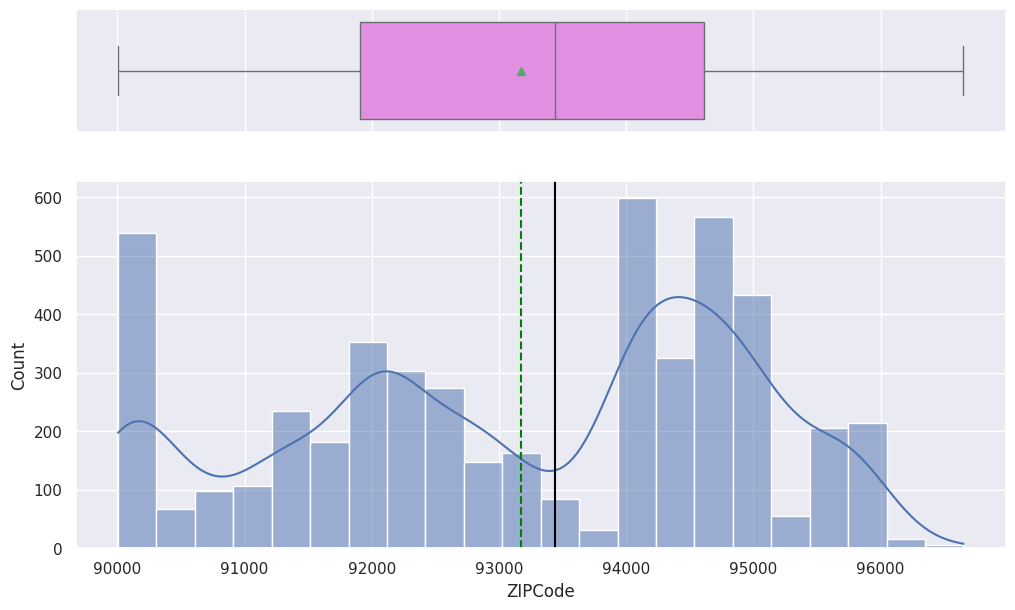

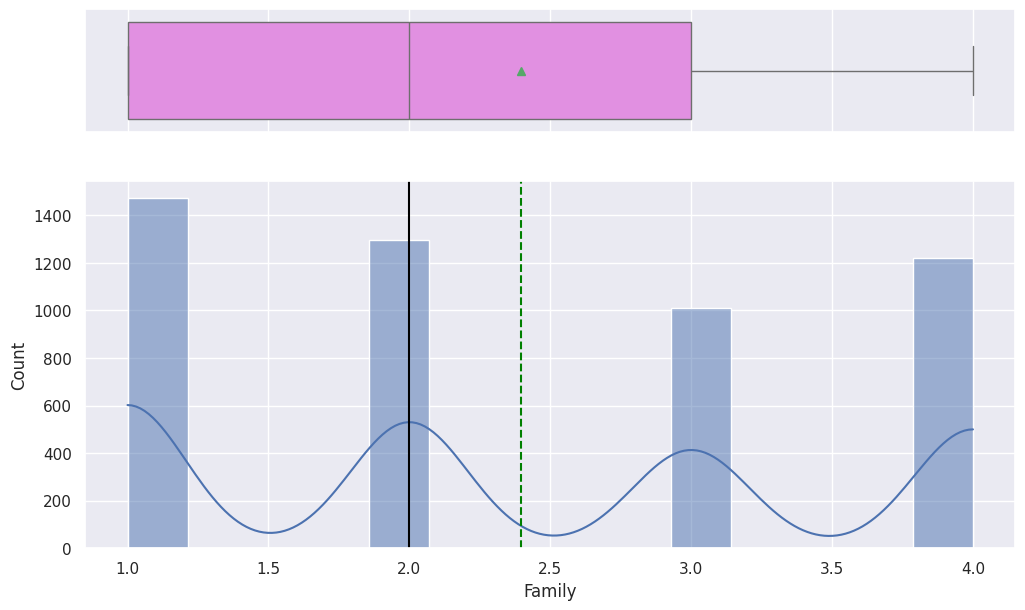

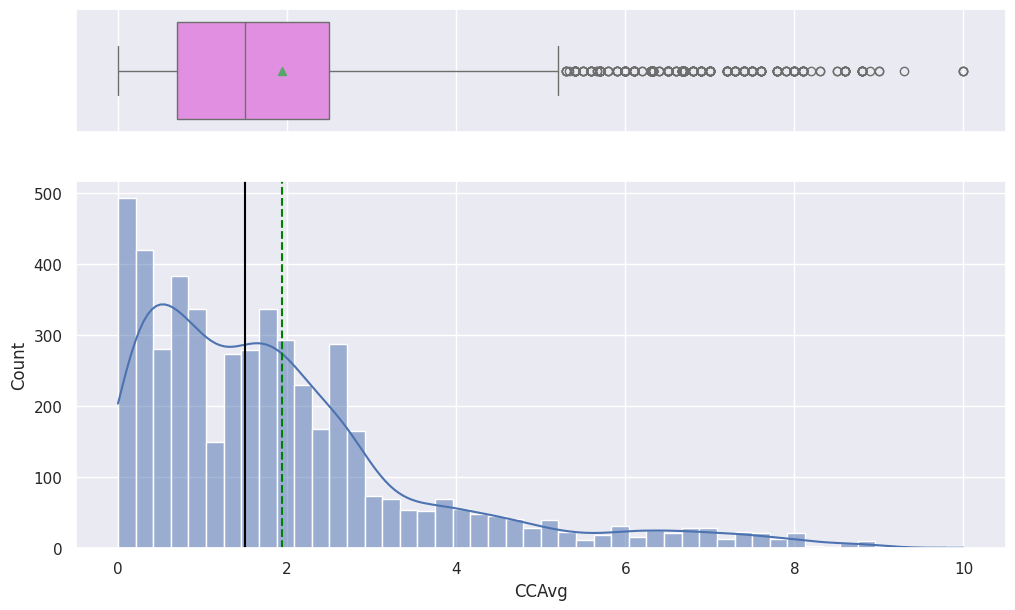

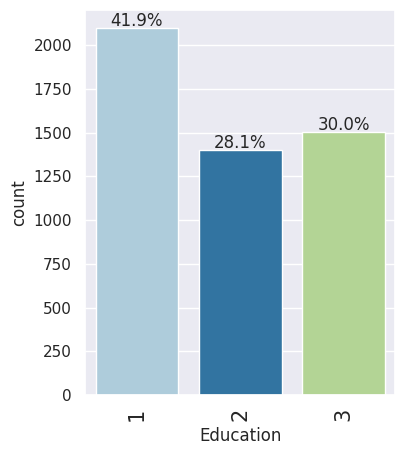

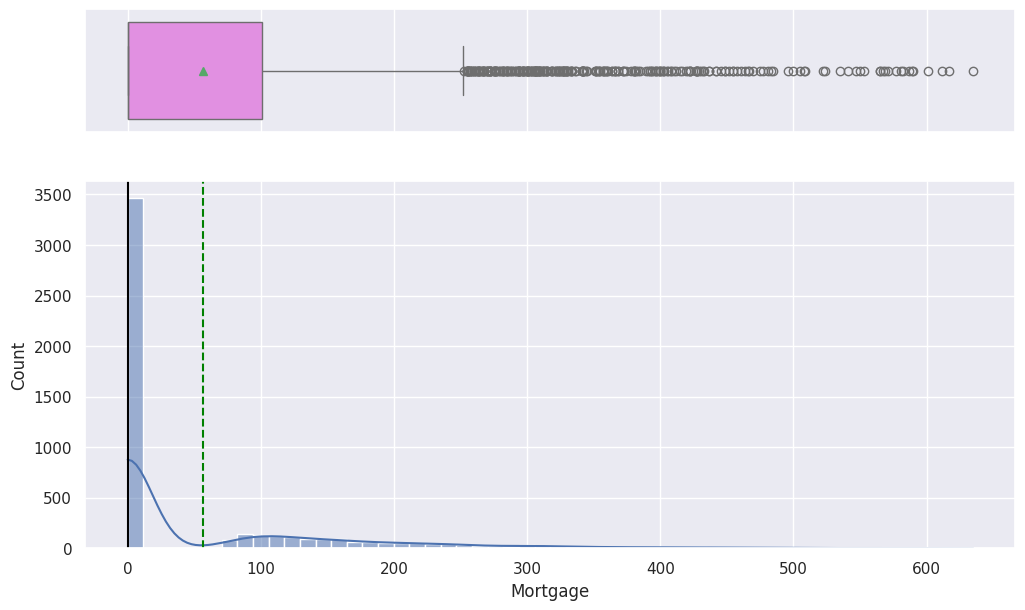

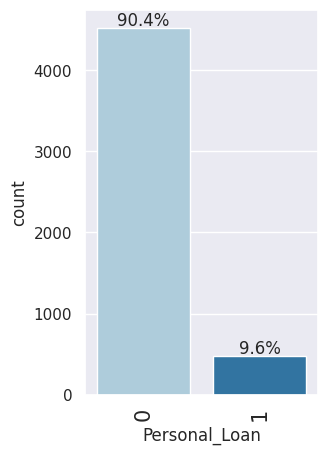

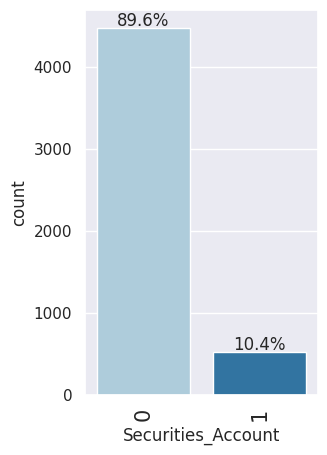

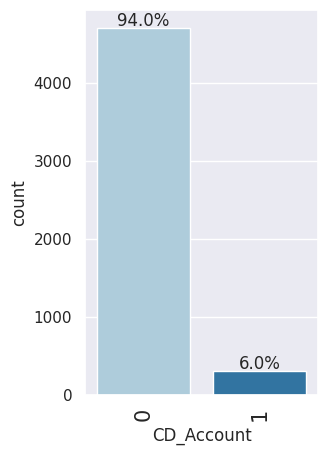

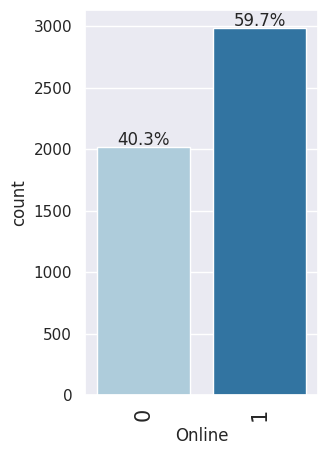

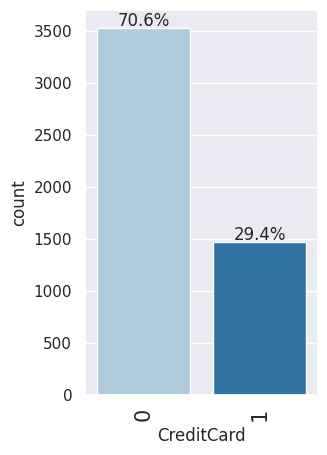

In [ ]:
# edaVisuals function is from the linreg.ipynb notebook
# Visualization of univariates with box, histograms, and count plots

edaVisuals(dfmodel, True, True)

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

### <a name="bia">Bivariate Analysis</a>
  *  Customers with higher income are more likely to take out loans, as shown by the positive correlation (0.5) between income and personal loans.

  *   A weaker positive correlation (0.37) exists between credit card average balance and personal loans. This suggests that customers who use their credit cards more frequently might also be more likely to apply for loans.

  *   A weaker positive correlation (0.32) between CD accounts and personal loans indicates Customers with CD accounts might be more likely to apply for loans.

  *  Higher education levels correlate with loan purchases. Customers with education levels 2 and 3 purchased more loans compared to those with lower education (level 1).

  *  Customers with larger families (3 or more members) were more likely to purchase for loans, likely due to increased financial needs.

  *  Loan purchases are mostly evenly distributed across zip codes, with slightly more loan purchases in zip codes starting with 93 and 95. This might require further investigation.

  *   There is no significant difference in loan application rates between those who use online services, have bank credit cards, or have bank security accounts compared to those who don't.

  *   Since age and experience have a very high correlation (0.99), we can drop the experience column as it provides redundant information.

  *  Customers with Higher mortage balances purchased more loans.

  *  Reviewing the boxplot for Age and Personal_Loan it appears there isn't much different between the two.  The median age for customers is almost the same for customers that purchased a loan than those that didn't.

  *  Reviewing the boxplot for Experience and Personal_Loan it appears there isn't much different between the two.  The median experience for customers is almost the same for customers that purchased a loan than those that didn't.

  *  A higher percentage of customers with CD Accounts purchased loans.  Approximately 46%.

*   A slightly higher percentage of customers with bank security accounts purchased loans, however, the difference wasn't significant.







#### Bivariate Analysis Visualizations

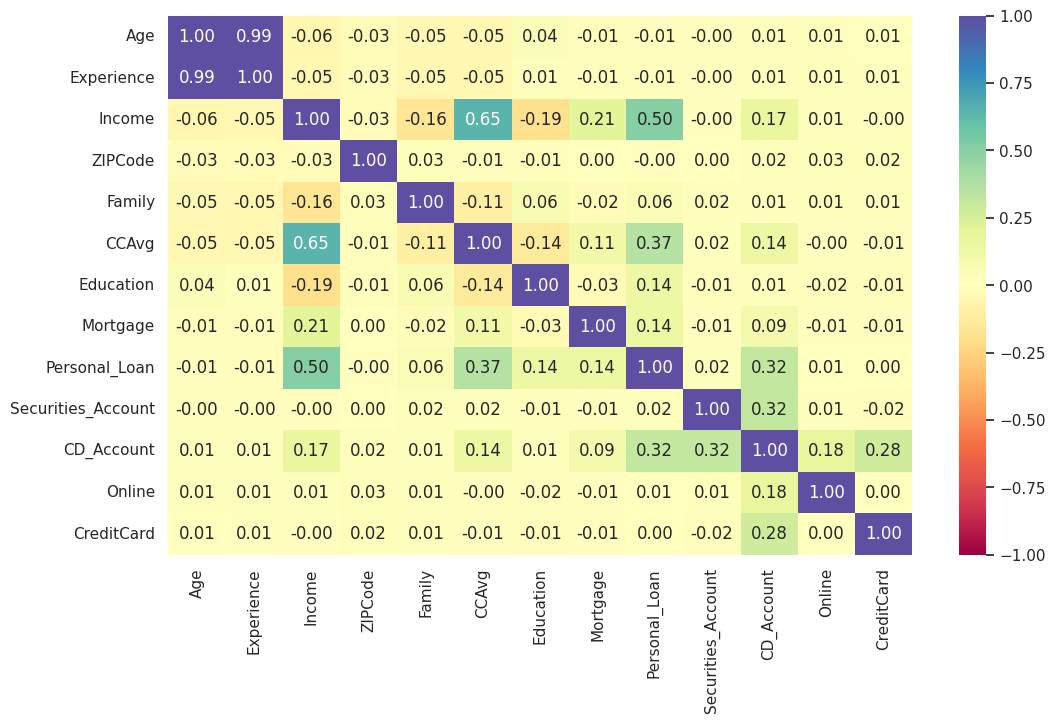

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(dfmodel.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Age and Experience are highly correlated at 99%, since we don't need them both,
will drop Experience.

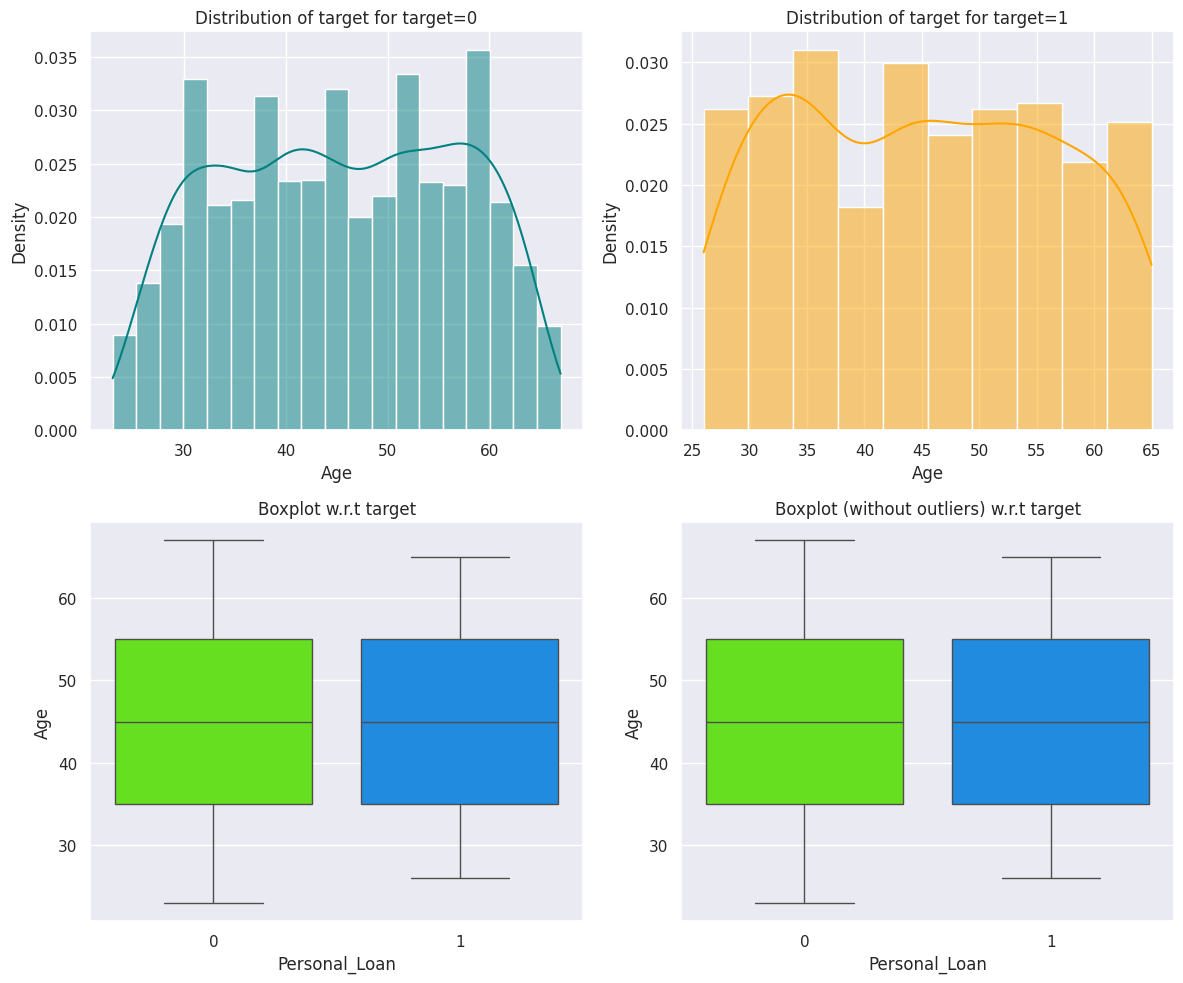

In [ ]:
# Distirbution plot to visualize relationship between Age and Personal Loan
distribution_plot_wrt_target(dfmodel, "Age", "Personal_Loan")

Reviewing the boxplot for Age and Personal_Loan it appears there isn't much different between the two.  The median age for customers is almost the same for customers that purchased a loan and those that didn't.

It appears that people with higher mortage values, purchased loans more than those that did not.  

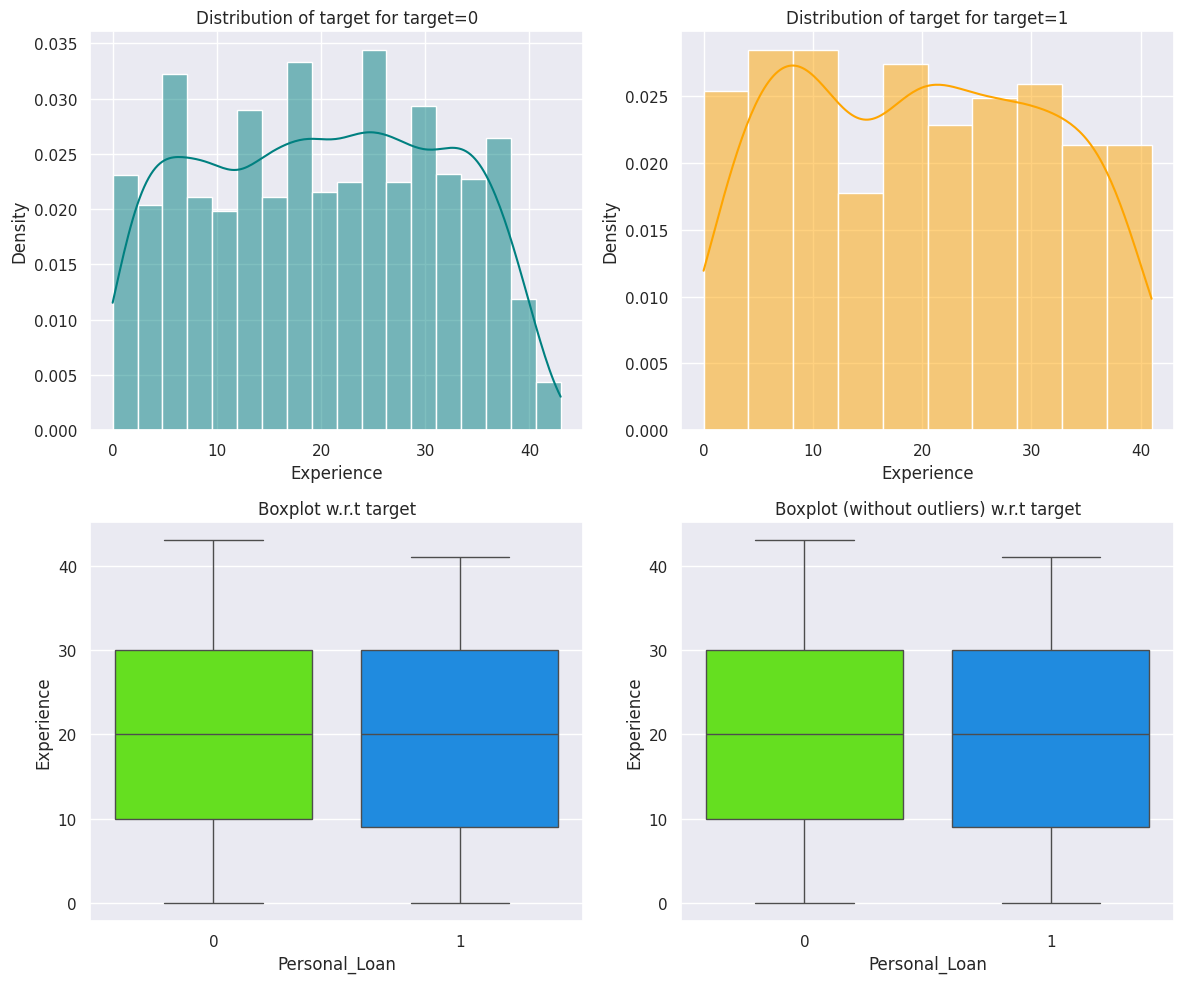

In [ ]:
# Distirbution plot to visualize relationship between Experience and Personal Loan
distribution_plot_wrt_target(dfmodel, "Experience", "Personal_Loan")

Reviwing the boxplot for Experience and Personal_Loan it appears there isn't much different between the two.  The median experience for customers is almost the same for customers that purchased a loan than those that didn't.

In [ ]:
#  What percentage of customers have a CCAvg greater than 0

custCC = dfmodel[dfmodel["CCAvg"] > 0].shape[0] / dfmodel.shape[0] * 100
f"Percentage of customers have a CCAvg greater than zero: {custCC} %"

'Percentage of customers have a CCAvg greater than zero: 97.88 %'

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


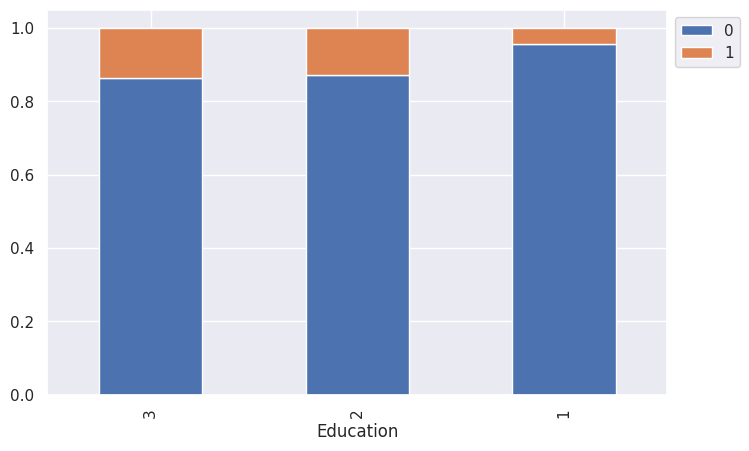

In [ ]:
# barplot of Education and Personal_Loan
stacked_barplot(dfmodel, "Education", "Personal_Loan")

Stacked barpot for Education and Personal Loan, shows more people with education levels of 2 and 3 were more likely to purchase a loan.

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


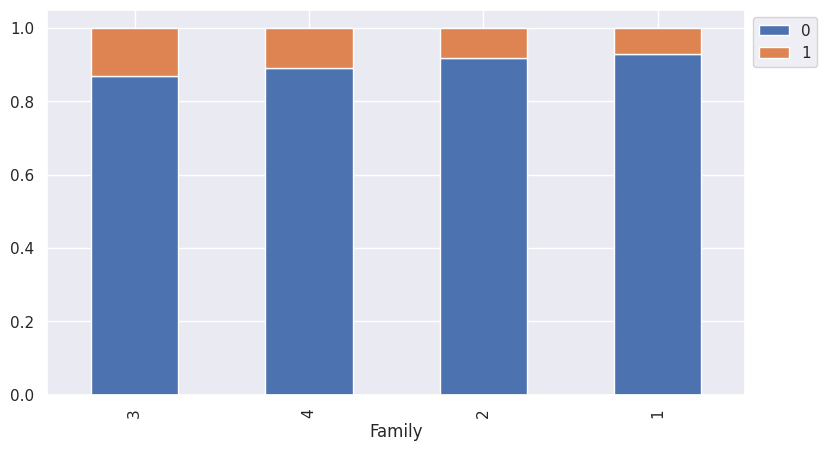

In [ ]:
stacked_barplot(dfmodel, "Family", "Personal_Loan")

There appears to be more Loan Purchases for customers with family size of 3 and
more.  

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


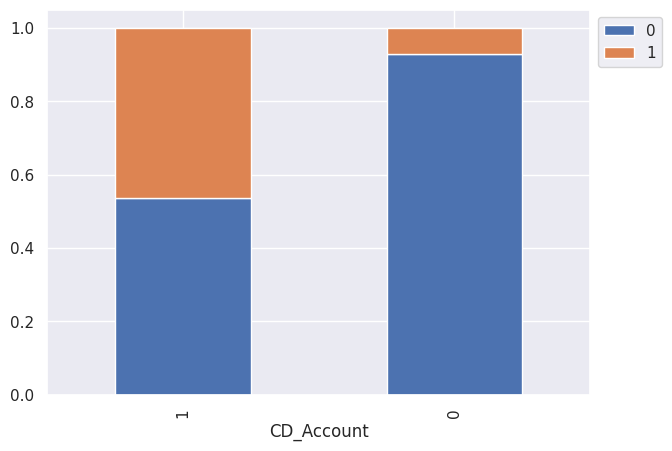

In [ ]:
stacked_barplot(dfmodel, "CD_Account", "Personal_Loan")

A higher percentage of customers with CD Accounts purchased loans.  Approximately 46%.

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


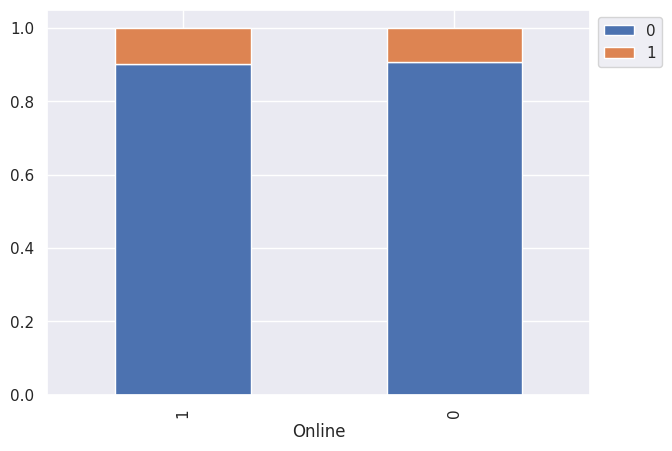

In [ ]:
stacked_barplot(dfmodel, "Online", "Personal_Loan")

Online service usage showed no significant difference between loan purchasers and non-purchasers.

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


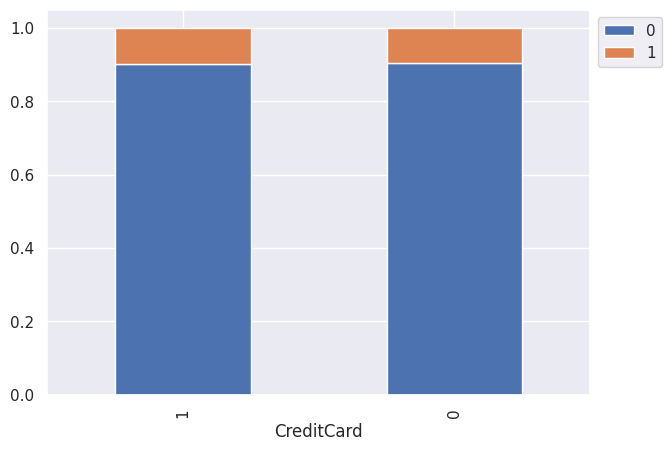

In [ ]:
stacked_barplot(dfmodel, "CreditCard", "Personal_Loan")

Having a credit card showed no significant difference between loan purchasers and non-purchasers.

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


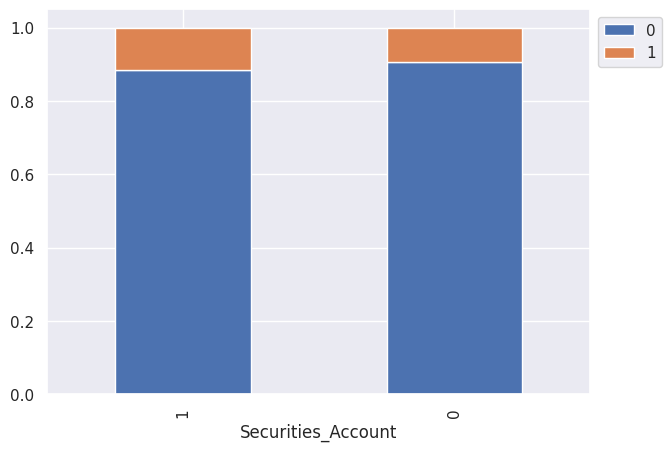

In [ ]:
stacked_barplot(dfmodel, "Securities_Account", "Personal_Loan")

While a slightly higher percentage of customers with bank security accounts purchased loans, the difference wasn't significant.

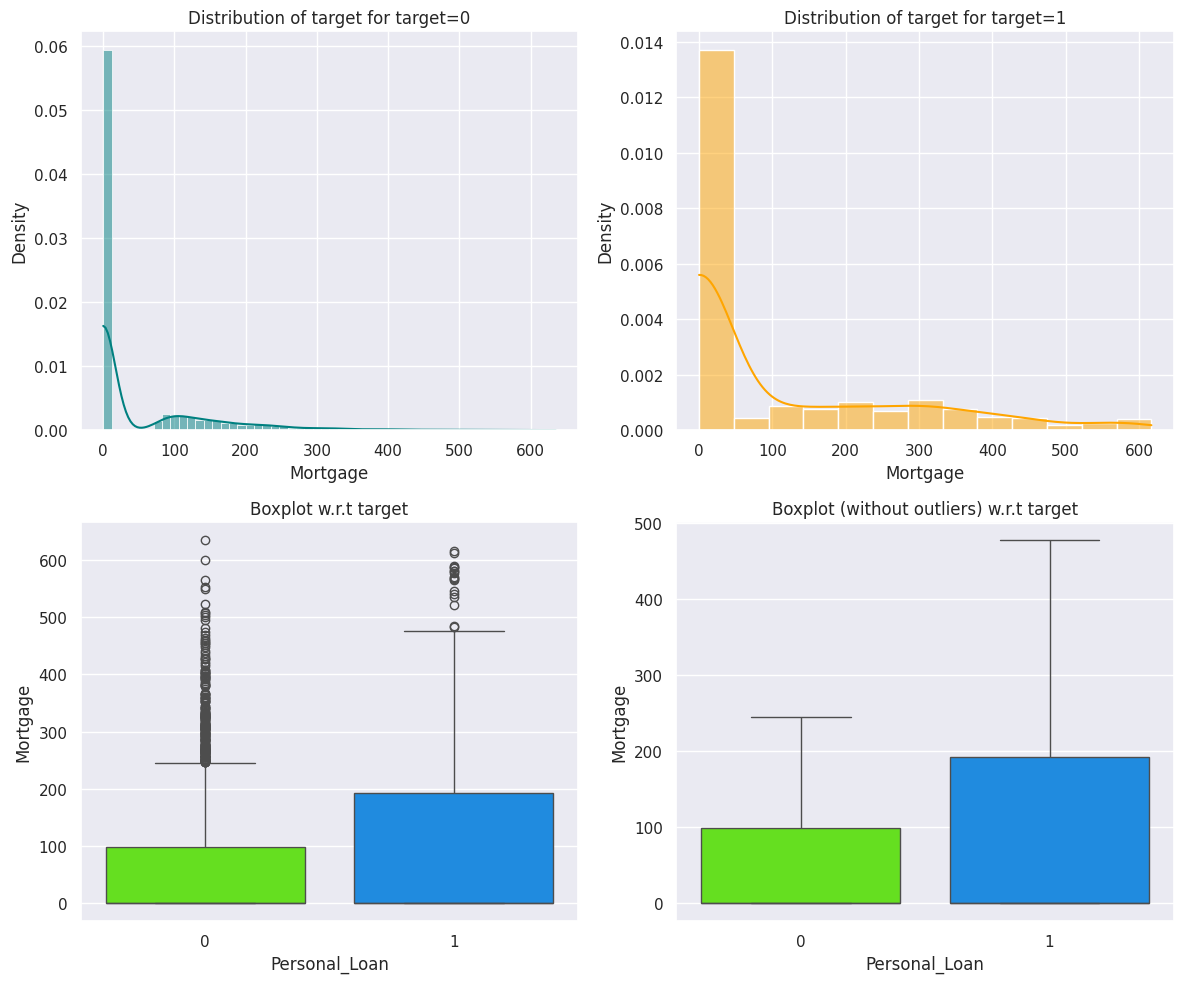

In [ ]:
distribution_plot_wrt_target(dfmodel, "Mortgage", "Personal_Loan")

It appears that there is a relationship between higher mortgage amoutns and customers that purchased loans.

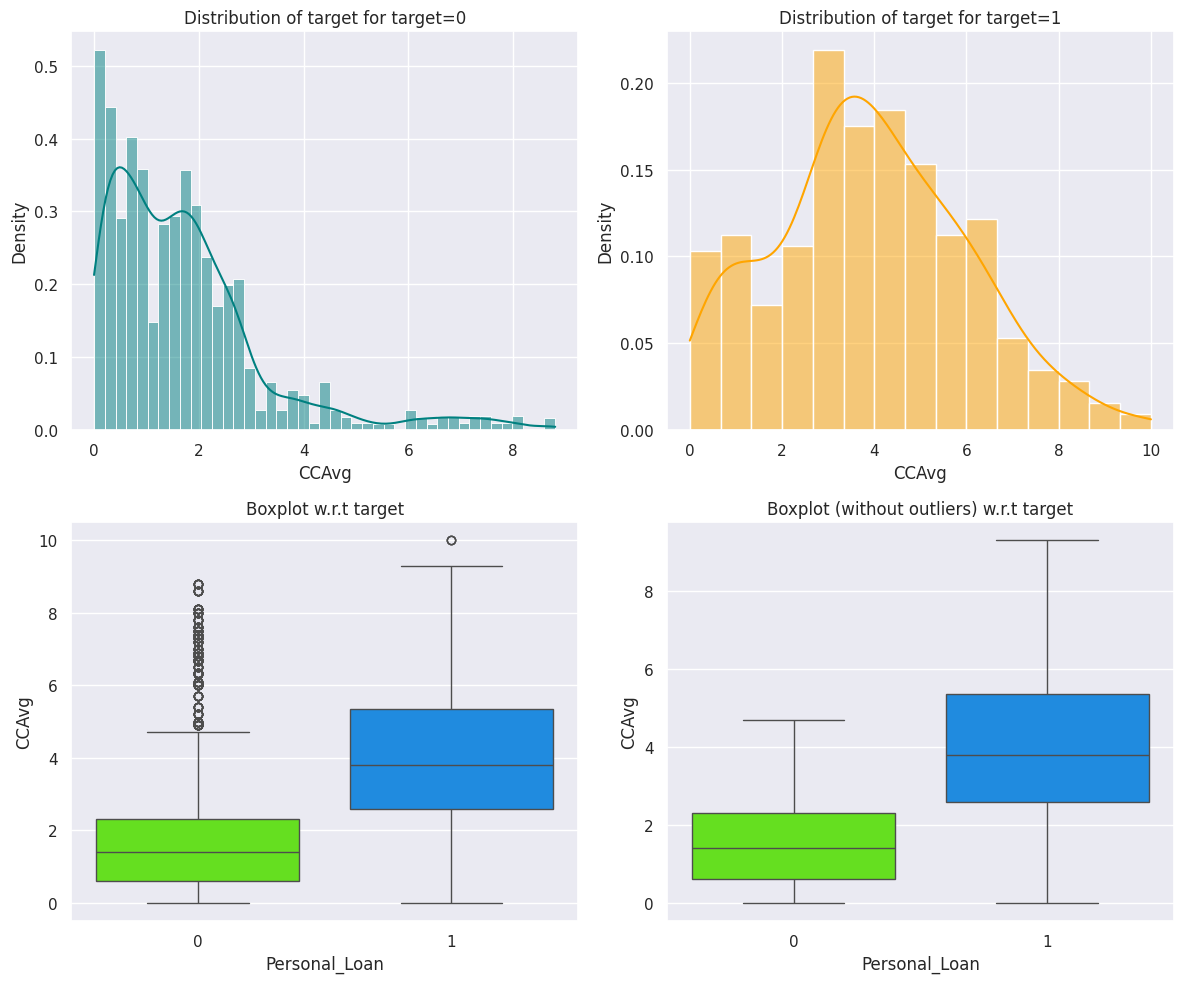

In [ ]:
distribution_plot_wrt_target(dfmodel, "CCAvg", "Personal_Loan")

Customers with higher credit card average balances (CCAvg) were more likely to have purchased loans compared to those with lower balances.


<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

## <a name="dataprocess">Data Preprocessing</a>

* The dataset was cleaned to ensure all values are usable for analysis.
* There were no missing values in the dataset.
* Negative values in the "Experience" column were converted to positive values.
*  Several columns containing categorical data (e.g., "Personal Loan", "Education") were converted from numerical format (int) to a categorical data type. This ensures the data is interpreted correctly in later analysis.


### <a name="feng">Feature engineering for Zip Code</a>

To incorporate geographic information, we initially converted zip codes to city names using the "uszipcode" package. However, this resulted in over 200 unique cities, creating a large number of dummy variables for modeling  (<a href="#zipeval">details in the appendix</a>).  The "uszipcode" package was also used to create a list of counties in the dataset.  There are 20 unique counties in the dataset.  This would also require the generation of a large number of dummy variables.


As an alternative, we explored using the first two digits of the zip code. These digits correspond to specific U.S. regions and resulted in only 7 unique categories. This approach significantly reduces the number of dummy variables while still capturing some regional variation.  The zip codes in this dataset are all located within Southern California



Finally, the ZipCode column will be converted to a categorical data type to reflect this new grouping.



Loan purchase proportions show minimal variation across most zip codes. Interestingly, zip codes starting with "96" exhibit a lower percentage of loan purchases. However, it's important to note that these zip codes only represent a very small portion of the data (0.8%).

In [ ]:
# convert ZIPCode to string

dfmodel["ZIPCode"] = dfmodel["ZIPCode"].astype("str")

In [ ]:
# get number of unique zip codes
dfmodel["ZIPCode"].nunique()

467

In [ ]:
# get first two characters for zipcode and see number of uniques

dfmodel["ZIPCode"].str[:2].nunique()

7

In [ ]:
# convert ZIPCode column to use first 2 digits
dfmodel["ZIPCode"] = dfmodel["ZIPCode"].str[:2]

In [ ]:
dfmodel["ZIPCode"].nunique()

7

In [ ]:
dfmodel["ZIPCode"].value_counts()

ZIPCode
94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: count, dtype: int64

These values represents zip codes from Southern California.  

In [ ]:
# convert ZIPCode to type object

dfmodel["ZIPCode"] = dfmodel["ZIPCode"].astype("object")

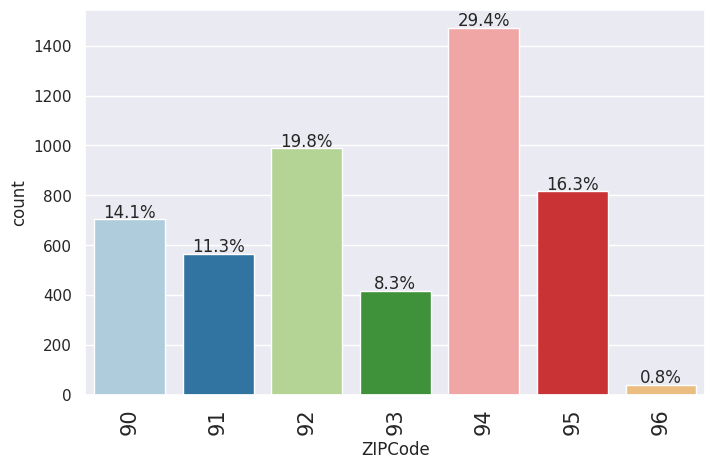

In [ ]:
# visualize Zipcode proportions

labeled_barplot(dfmodel, "ZIPCode", True)

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


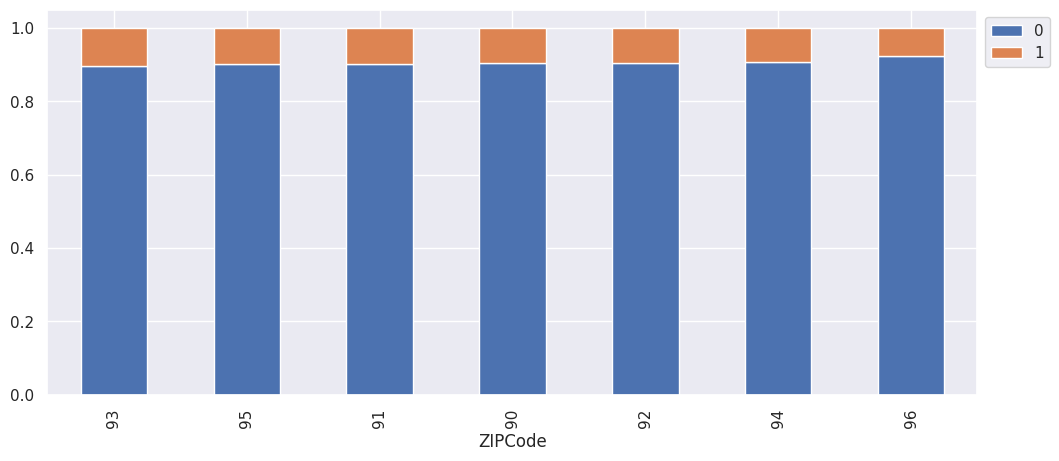

In [ ]:
# distribution of Personal Loans by ZIPCode
stacked_barplot(dfmodel, "ZIPCode", "Personal_Loan")

Loan purchase rates show minimal variation across most zip codes. However, zip codes starting with "96" have a lower proportion of loan purchases.

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

### <a name="od">Outlier Detection</a>

Outliers were visualized using box plots and calculating the values below the 25 quantile and above the 75 quantile, box plot visualizations are available in the <a href = #EDA>EDA Section</a>.

Mortgage, Credit Card Average (CCAvg), and Income have some data points that are significantly higher than the rest.

Since these outliers appear to be valid data points (e.g., not due to errors), the decision was made to keep the data as is for model building.


In [ ]:
# Dataframe that shows values for each numeric column that is below 25 quantile and above 75 quantile

import scipy.stats as stats
outliers_df = dfmodel.select_dtypes(include=["float64", "int64"]).apply(lambda x: stats.iqr(x))
df_outliers = pd.DataFrame({
    "column": outliers_df.index,
    "25th_quantile": dfmodel.select_dtypes(include=["float64", "int64"]).quantile(q=0.25),
    "75th_quantile": dfmodel.select_dtypes(include=["float64", "int64"]).quantile(q=0.75),
})
df_outliers["below_25th_quantile"] = dfmodel.select_dtypes(include=["float64", "int64"]).apply(lambda x: x.lt(df_outliers["25th_quantile"][x.name]).sum())
df_outliers["above_75th_quantile"] = dfmodel.select_dtypes(include=["float64", "int64"]).apply(lambda x: x.gt(df_outliers["75th_quantile"][x.name]).sum())
df_outliers


,column,25th_quantile,75th_quantile,below_25th_quantile,above_75th_quantile
Age,Age,35.00,55.00,1123,1216
Experience,Experience,10.00,30.00,1171,1157
Income,Income,39.00,98.00,1231,1246
Family,Family,1.00,3.00,0,1222
CCAvg,CCAvg,0.70,2.50,1212,1248
Mortgage,Mortgage,0.00,101.00,0,1242


<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

## <a name="mbuilding">Model Building</a>

### <a name="evalandcrit">Model Evaluation Criterion</a>

***This section outlines the key considerations for evaluating the loan prediction model:***

**Goal**: Our primary goal is to identify customers who are likely to purchase a loan, enabling targeted marketing and outreach. Additionally, we aim to understand the factors influencing loan applications.


**Evaluation Metric**: Since correctly identifying potential loan applicants is crucial, we will use **Recall** as the primary evaluation metric. **Recall** measures the proportion of true positives (customers who purchased a loan) that the model correctly identifies.

**Model Selection Strategy**: We will begin with a Full Decision Tree model and explore both pre-pruning and post-pruning techniques. This iterative approach allows us to compare different model configurations and select the one that best achieves our desired outcome.

By focusing on **Recall** and exploring various decision tree configurations, we aim to develop a robust model for identifying potential loan customers.

#### **Model Predictions**



This section details the approach to predicting loan purchases and evaluating model performance:


---


**Prediction Targets:**

The model will predict whether a customer is likely to purchase a loan (positive) or not (negative).


---


***Evaluation Matrix:***

  **True Positive (Maximize**): The ideal scenario - the model correctly identifies a customer who purchases a loan. We want to maximize this outcome.


  **False Negative (Acceptable)**: The model predicts a customer won't purchase a loan, but they do. While not ideal, this is considered less critical than false positives.

  **False Positive (Minimize)**: The model predicts a customer will purchase a loan, but they don't. This is a costly mistake for the bank, so we want to minimize it.

  **True Negative**: The model correctly identifies a customer who doesn't purchase a loan.




---


**Metric Choice**:


Since AllLife Bank prioritizes maximizing true positives and minimizing false positives, recall is chosen as the primary evaluation metric. Recall focuses on identifying true positives, aligning perfectly with the bank's goals.





<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

#### <a name="varprep">Prepare Model Variables</a>

In [ ]:
# Copy dfmodel to new variable modeldata

modeldata = dfmodel.copy()

In [ ]:
# Get dataframe object types and non-null counts
modeldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   object  
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(5), object(1)
memory usage: 303.6+ KB


In [ ]:
# Populate X and y variables
# Also dropping "Experience" column due to 99% correlation with Age

X = modeldata.drop(["Experience", "Personal_Loan"], axis=1)
y = modeldata["Personal_Loan"]

In [ ]:
# Create dummy variables for categorical data

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

In [ ]:
# see detials for the feature variables
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   Family              5000 non-null   int64   
 3   CCAvg               5000 non-null   float64 
 4   Mortgage            5000 non-null   int64   
 5   Securities_Account  5000 non-null   category
 6   CD_Account          5000 non-null   category
 7   Online              5000 non-null   category
 8   CreditCard          5000 non-null   category
 9   ZIPCode_91          5000 non-null   bool    
 10  ZIPCode_92          5000 non-null   bool    
 11  ZIPCode_93          5000 non-null   bool    
 12  ZIPCode_94          5000 non-null   bool    
 13  ZIPCode_95          5000 non-null   bool    
 14  ZIPCode_96          5000 non-null   bool    
 15  Education_2         5000 non-null   bo

In [ ]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
# Get shape and value_counts for test and train datasets
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0   0.91
1   0.09
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0   0.90
1   0.10
Name: proportion, dtype: float64


For Both Test and Train datasets:

~90% of observations have Personal_Loan = 0

~10% of observations have Personal_Loan = 1



<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

### Model Building

#### **<a name="fulltree">Full Decision Tree** - No Pruning</a>

In [ ]:
# create a list of column names by feature, to use in visualizations

column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


In [ ]:
# Initialize the default model with random_state=1

modelD = DecisionTreeClassifier(random_state=1)
modelD.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

##### Default Decision Tree - Training Data

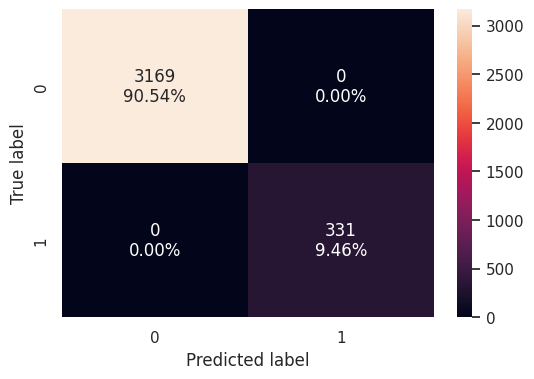

In [ ]:
# Display confussion matrix for Default Model using training data
confusion_matrix_sklearn(modelD, X_train, y_train)

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

##### <a name="ft_trainmet">Full Decision Tree Training Metrics</a>

In [ ]:
#  Metrics for Default Decision Tree Training Data
dTree_Default_Train = model_performance_classification_sklearn(modelD, X_train, y_train)
dTree_Default_Train

,Accuracy,Recall,Precision,F1
0,1.00,1.00,1.00,1.00


*  The model achieves perfect accuracy, recall, precision, and F1-score on the training data. This suggests the model has memorized the training data perfectly.
*  0 errors on the training set data, but will need to run on test data

##### Full Decision Tree - Test Data

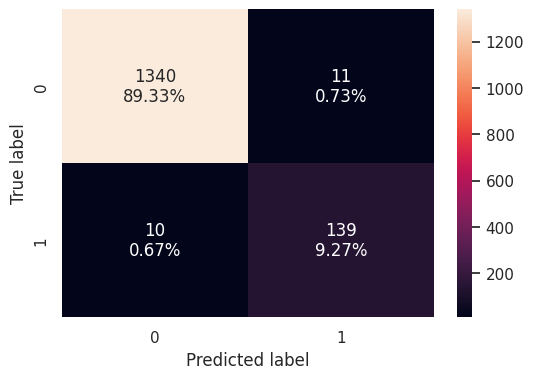

In [ ]:
# Confusion Maxtrix on Test Data
confusion_matrix_sklearn(modelD, X_test, y_test)

##### <a name="ft_testmet">Full Decision Tree Test Metrics</a>

In [ ]:
#  Metrics for Default Decision Tree Test Data
dTree_Default_Test = model_performance_classification_sklearn(modelD, X_test, y_test)
dTree_Default_Test

,Accuracy,Recall,Precision,F1
0,0.99,0.93,0.93,0.93


###### <a name="fullvisuals">Full Decision Tree Visualization and Text Format</a>

<a href="#dTree">Full Decision Tree Visualization</a> is available in the Appendix.

<a name="dmodel"></a>

##### Full Decision Tree - Text Output

In [ ]:
# Decision tree in text format for Default decision tree model

print(tree.export_text(modelD, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

##### <a name="fullFeature">Full Decision Tree Feature Importance</a>

Text(0.5, 0, 'Relative Importance')

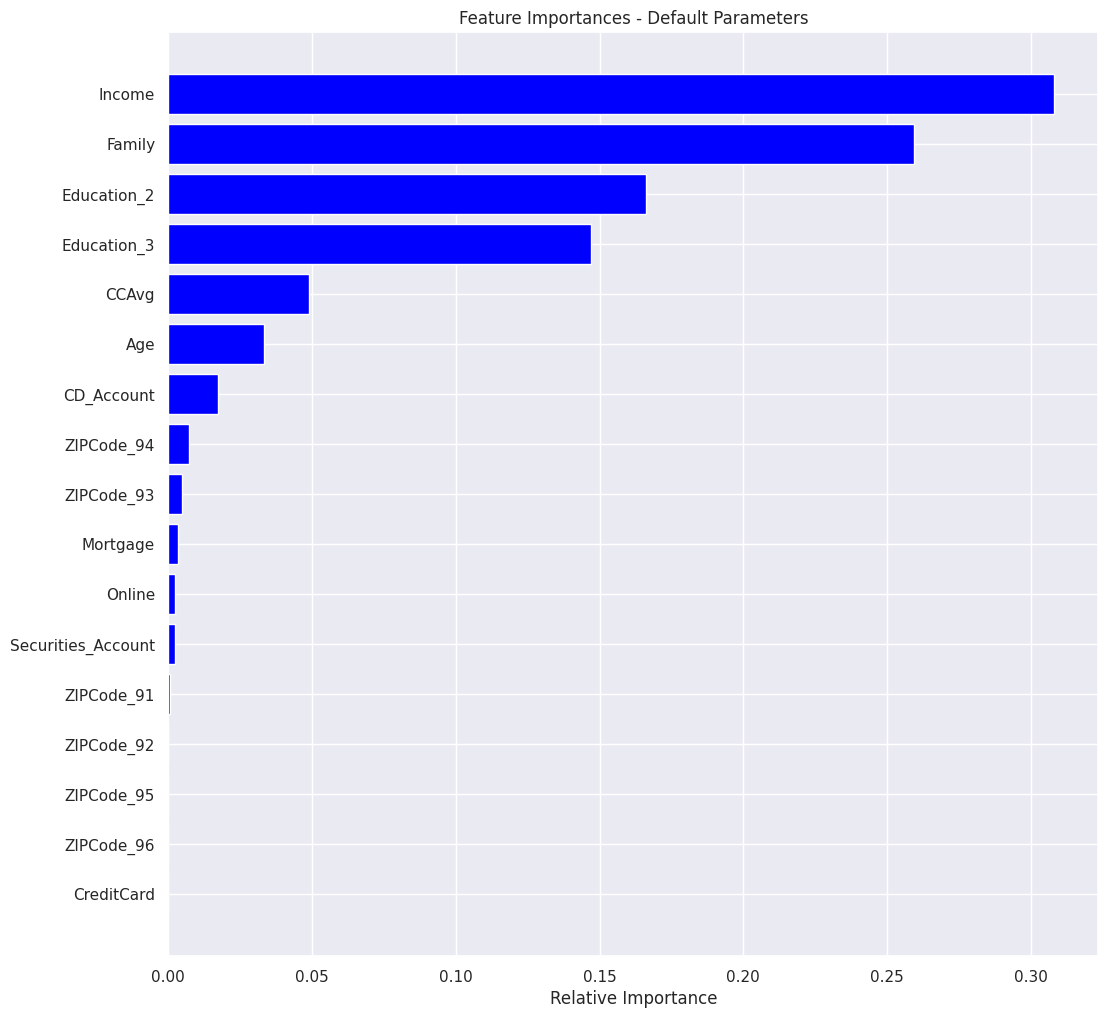

In [ ]:
# Visualize feature importance for Default Model ModelD

importances = modelD.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances - Default Parameters")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")


In [ ]:
#Print the Importance factor for each feature

print(
    pd.DataFrame(
        modelD.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income             0.31
Family             0.26
Education_2        0.17
Education_3        0.15
CCAvg              0.05
Age                0.03
CD_Account         0.02
ZIPCode_94         0.01
ZIPCode_93         0.00
Mortgage           0.00
Online             0.00
Securities_Account 0.00
ZIPCode_91         0.00
ZIPCode_92         0.00
ZIPCode_95         0.00
ZIPCode_96         0.00
CreditCard         0.00


<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

#### **<a name="fullanalysis">Full Decision Tree Analysis</a>**

The default decision tree model revealed some interesting patterns in loan purchase behavior:


**Importance of Income:** Income was the most important feature for the model, suggesting a clear link between higher income and loan applications. This is reflected in the first split: customers with income greater than $116.5k are more likely to get loans.



> Customers with income exceeding $116.5k, a family size of 2.5 members or less, and an education level of 2 or higher are predicted to be more likely to purchase a loan according to the top decision tree rule.




**Complexity for Lower Incomes:** The decision tree becomes more complex for those with lower incomes (less than $116.5k). Factors like credit card average (CCAvg), CD accounts, family size, and age become relevant for predicting loan purchases in this group.

**Higher Income, Larger Families, and Debt:** Overall, the model suggests that customers with higher income, larger families, and higher credit card debt are more likely to be predicted as loan purchasers by the default decision tree model.



  

**Good Model Performance with Potential Slight Overfitting**

The model achieved very high accuracy, recall, precision, and F1-score on the training data, indicating a good fit. However, there are some hints of potential overfitting:

*   A slight drop in accuracy (from 1.0 to 0.986) on the test data compared to training data.
*   Marginally lower recall (0.933) and precision (0.927) on the test data compared to perfect scores in training.


Despite this, the overall test data metrics remain very strong (accuracy around 0.98, recall and F1 close to 0.93), suggesting the model is:

*   Capturing the general relationships in the data.
*   Generalizing reasonably well to unseen examples.


It's important to monitor the model's performance on future unseen data to ensure it continues to perform well.

#### **Full Decision Tree - No Pruning (with class_weights)**

To address the class imbalance in the data, where the positive class (customers who purchased a loan) represents only about 10%, a new decision tree model was built with class_weights="balanced".

The decision tree model with class_weights="balanced" did not result in significant performance improvement. You can find details on this model in the Appendix (<a href="#weights">Decision Tree with Weights</a>).

<a name="treeWeights"></a>

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

### <a name="modelimprove">Model Performance Improvement</a>

#### <a name="preprune">Pre Pruning - Hyperparameter tuning</a>

To prioritize identifying true loan purchasers (True Positives) , we'll use pre-pruning Hyperparameter Tuning and set the evaluation metric to Recall (recall_score).

##### Evaluation Metric = Recall Score

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 18, 3),
    "min_samples_split": [1, 2, 5, 10, 15],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the training data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=1)

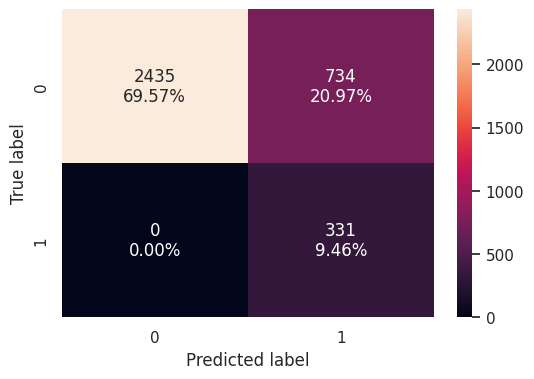

In [ ]:
# Print confusion matrix for training data
confusion_matrix_sklearn(estimator, X_train, y_train)

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>


##### <a name="pretreemet">Pre prunned Decision Tree Training Metrics</a>

In [ ]:
# Print performance metrics for training data
dTree_CV_Train = model_performance_classification_sklearn(estimator, X_train, y_train)
dTree_CV_Train

,Accuracy,Recall,Precision,F1
0,0.79,1.00,0.31,0.47


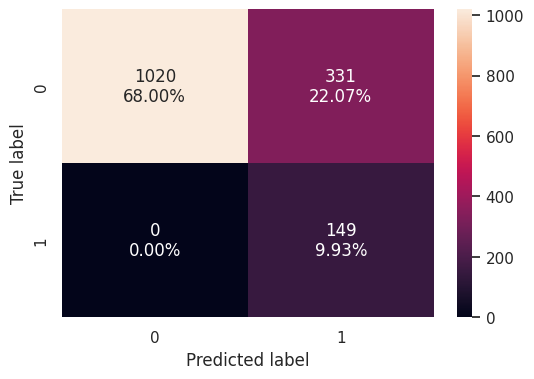

In [ ]:
# Print confusion matrix for test data
confusion_matrix_sklearn(estimator, X_test, y_test)

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

##### <a name="pretestmet">Pre prunned Decision Tree Test Metrics</a>


In [ ]:
#Print performance metrics for test data
dTree_CV_Test = model_performance_classification_sklearn(estimator, X_test, y_test)
dTree_CV_Test

,Accuracy,Recall,Precision,F1
0,0.78,1.00,0.31,0.47


###### <a name="previsuals">Hyperparameter Pre-Pruned Decision Tree Visualization and Text Rules</a>

The <a href="#hyperTree">Hyperparameter Pre-Pruned Decision Tree visualization </a>is available in the appenix.



<a name="preprunevisualrules"></a>

In [ ]:
# Print decision tree rules and features
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

##### <a name="preimportance">Pre Prunned Tree Feature Importances</a>

Text(0.5, 0, 'Relative Importance')

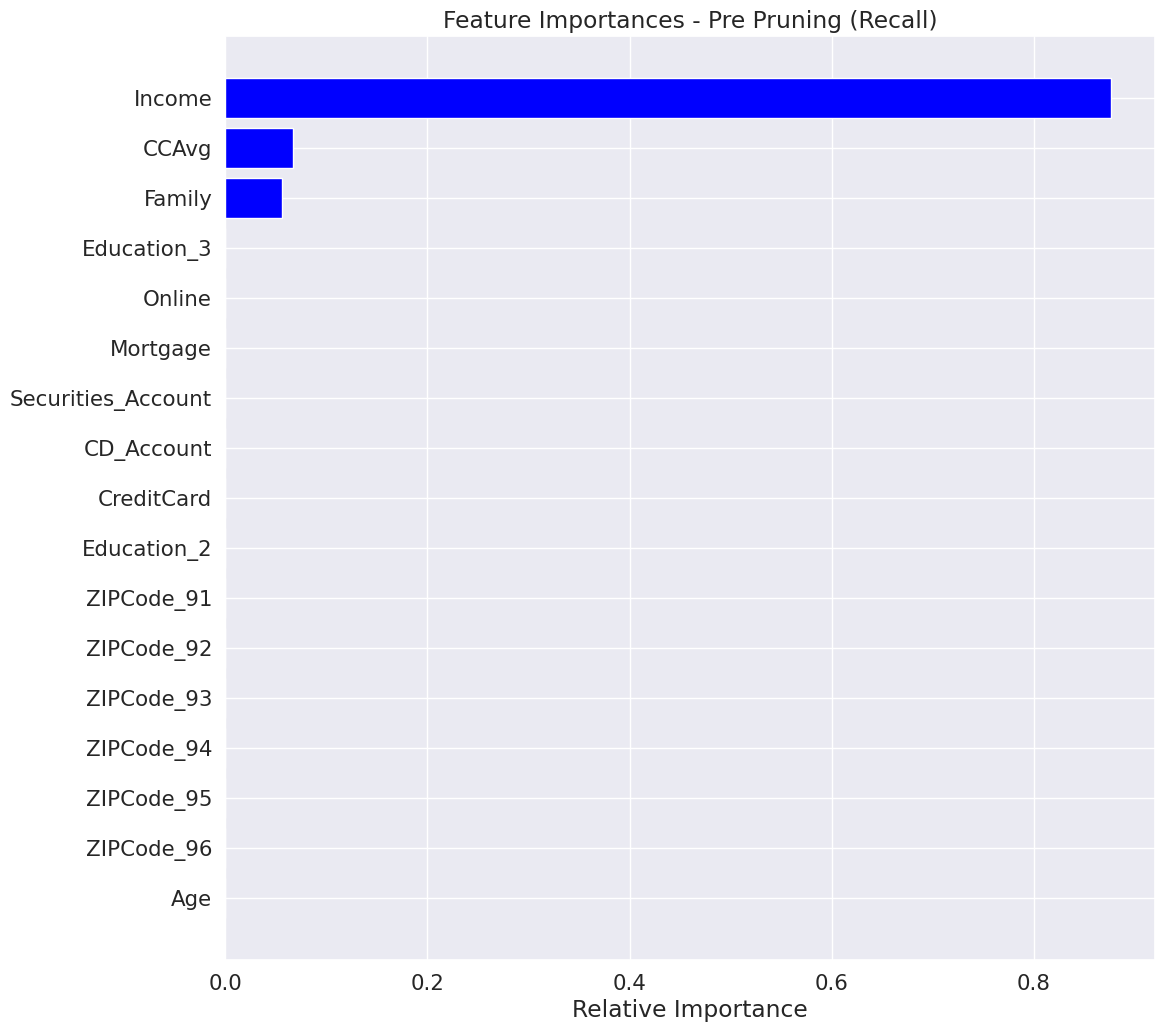

In [ ]:
# Display plot of tree features by importance
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances - Pre Pruning (Recall)")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")


##### **<a name="preanalysis">Pre Pruning (Recall) Model Analysis</a>**

Hyperparameter tuning with a scoring metric of Recall was used to model the tree. The resulting model is extremely simple to understand, however, it gives a recall score of 1 on both test and training data, but precision and F1 are extremely low for both training and test data.

The accuracy scores (0.79 and 0.78) are very similar for both training and test data. This suggests the model might not be severely overfitting.

A perfect recall (1) in both training and test data indicates the model identifies all positive cases correctly.

However, The low precision (0.31) for both training and test data is a red flag. It means out of all the data points the model classified as positive, only 31% were actually positive. This is a concern regardless of overfitting. This could also be an issue, as marketing to customers can be costly, and the bank should focus on actually marketing to customers that more likely to purchase a loan.  

The model identifies income as the most important factor for loan purchases.


Interestingly, it predicts that all customers with income exceeding $92.5K will get a loan, regardless of family size.


The model identifies customers with two key characteristics as more likely to purchase loans: income below \$92.5k and a credit card average (CCAvg) exceeding \$2.95k.



<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

#### **<a name="postprunning">Post Pruning - Cost Complexity Pruning**

In [ ]:
# Initialize Decision tree and define cost complexity path
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
# print out ccp_alphas and impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.00,0.00
7,0.00,0.01
8,0.00,0.01
9,0.00,0.01


##### <a name="impvisual">Impurity vs Alpha Visualizations</a>

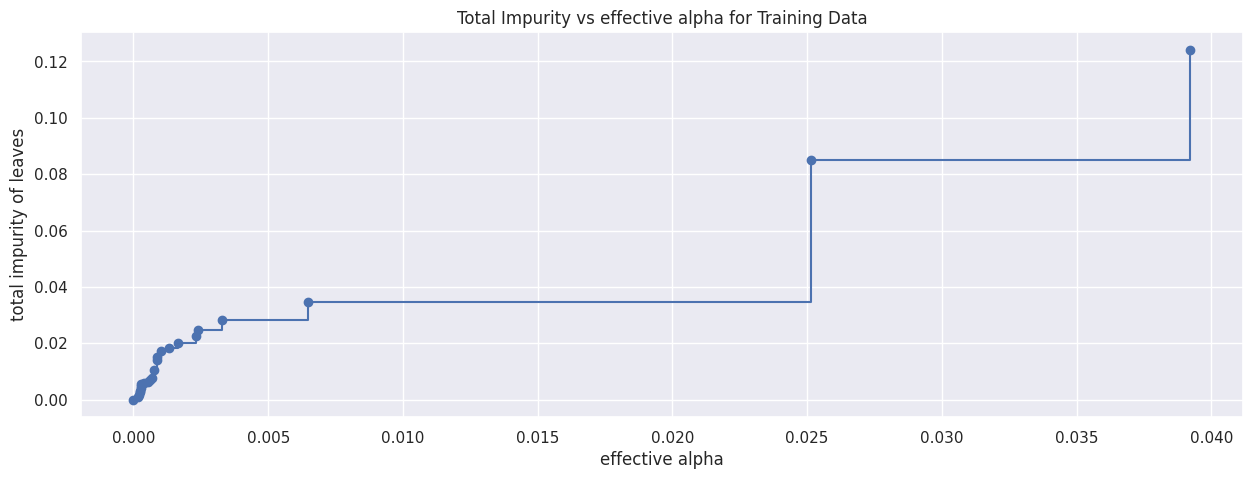

In [ ]:
# Plot Total Impurity vs Alpha for training data
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for Training Data")
plt.show()

In [ ]:
# loop through alphas and create a decision model for each
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


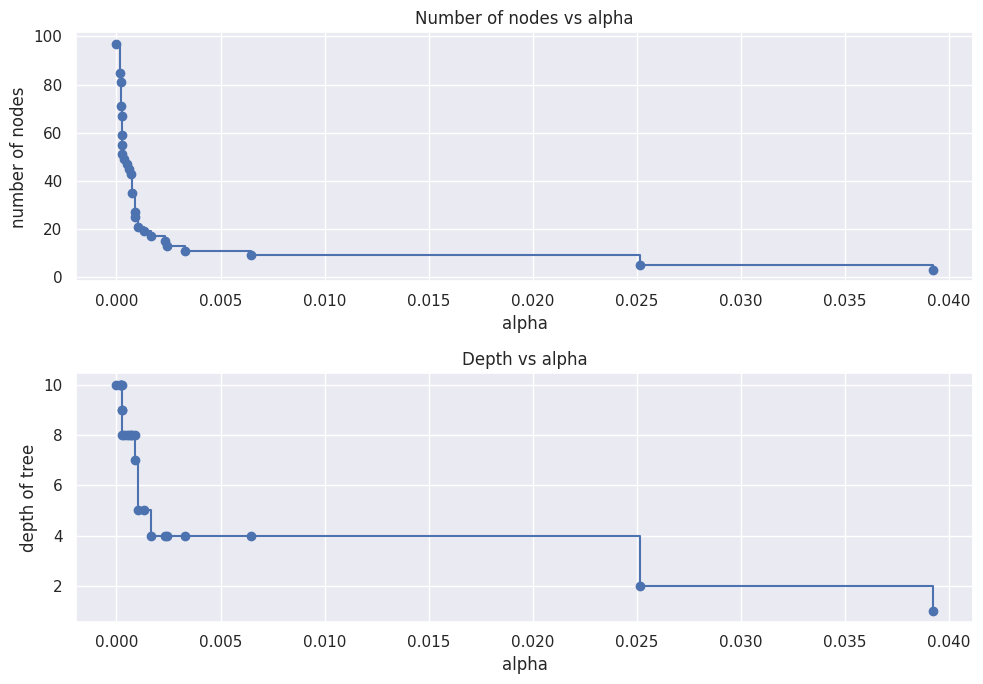

In [ ]:
# plot chart showing num of nodes vs alpha and tree depth
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
# Create list of recall metrics for training data
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

# Create list of recall metrics for test data
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

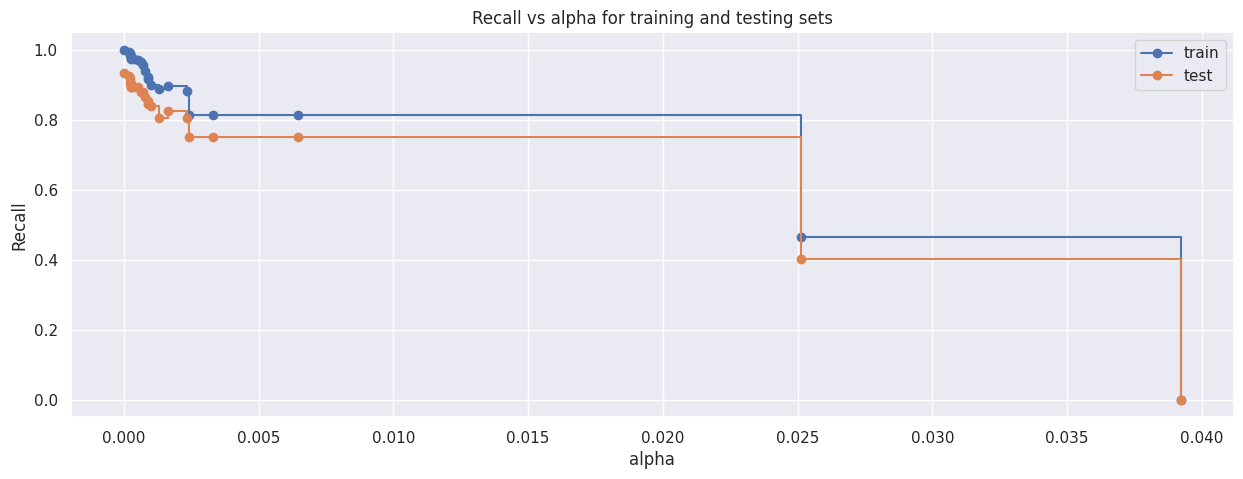

In [ ]:
# plot graph of recall vs alpha for both test and training data

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

##### <a name="bestmodel">Selecting the best model</a>

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [ ]:
np.argmin(recall_test)

23

In [ ]:
worstmodel = clfs[23]
print(worstmodel)

DecisionTreeClassifier(ccp_alpha=0.03921599695778932, random_state=1)


In [ ]:
best_model.ccp_alpha

0.0

In [ ]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

This appears to be the same model as out full decision tree (default model)

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

#### <a name="prunedtrainmet">Pruned Model - Training Metrics</a>

In [ ]:
# display metrics for training data set
dtree_postpruned_train = model_performance_classification_sklearn(best_model, X_train, y_train)
dtree_postpruned_train

,Accuracy,Recall,Precision,F1
0,1.00,1.00,1.00,1.00


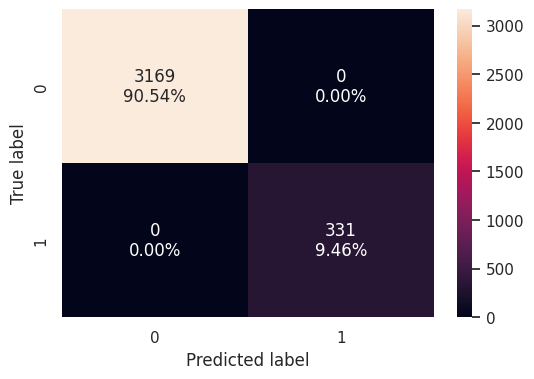

In [ ]:
# display confusion matrix for training dataset
confusion_matrix_sklearn(best_model, X_train, y_train)

This appears to be the exact same model as the full Decision Tree Model

#### <a name="prunedtestmet">Pruned Model - Test Metrics</a>

In [ ]:
dtree_postpruned_test = model_performance_classification_sklearn( best_model, X_test, y_test)
dtree_postpruned_test

,Accuracy,Recall,Precision,F1
0,0.99,0.93,0.93,0.93


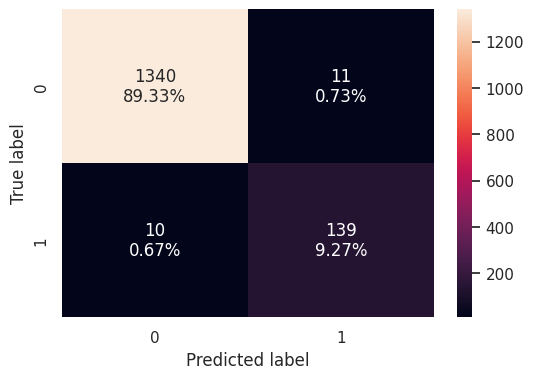

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

##### <a name="prunedvisuals">Cost Complexity Pruning Decision Tree Model Visualization and Text Rules</a>



The <a href="#custcomplextree">Cost Complexity Pruning Decision Tree visualization </a>is available in the appenix.



<a name="costcomplexvisual"></a>

In [ ]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

##### <a name="prunfeature">Pruned Model Feature Importance</a>

In [ ]:
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income             0.31
Family             0.26
Education_2        0.17
Education_3        0.15
CCAvg              0.05
Age                0.03
CD_Account         0.02
ZIPCode_94         0.01
ZIPCode_93         0.00
Mortgage           0.00
Online             0.00
Securities_Account 0.00
ZIPCode_91         0.00
ZIPCode_92         0.00
ZIPCode_95         0.00
ZIPCode_96         0.00
CreditCard         0.00


Text(0.5, 0, 'Relative Importance')

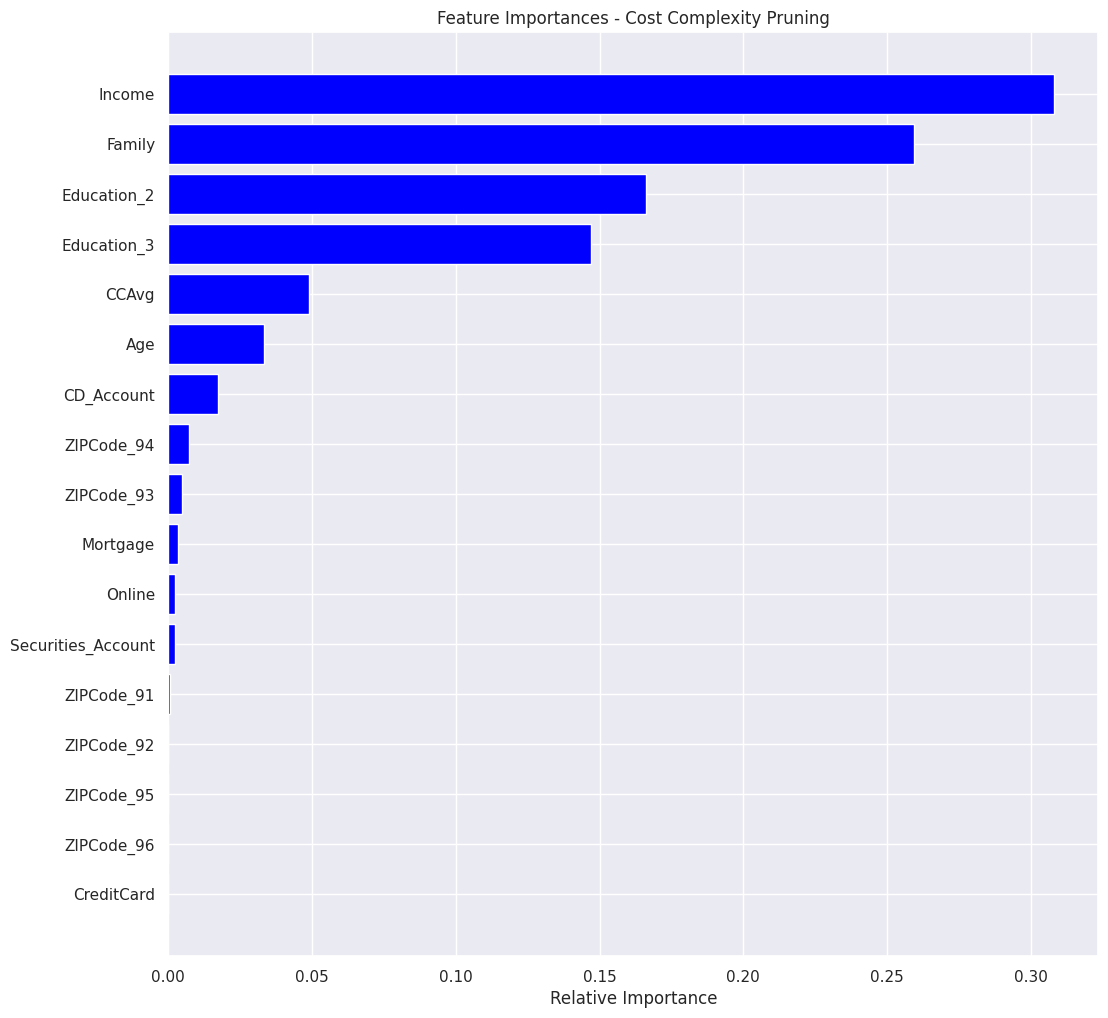

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances - Cost Complexity Pruning")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")


##### <a name="prunedanay">Pruned Model Analysis</a>

The Cost Complexity Pruning model, appears to be identical to the Full Decision Tree model we created.  Income, Family Members and Education are the top features that contribute to a customer potentially purchasing a loan.  

## <a name="compare">Model Comparison and Final Model Selection</a>

Three Decision Tree Models were created.  


*   **Full Model - Decision Tree model with default parameters** (Selected model)
*   Hyper parameter Pruning w/ Recall Score - Decision Tree model with Hyper parameter prunig, with emphasis on Recall Score
*   Post Pruning (Cost Complexity) - Decision Tree model w/ Cost Complexity Pruning

For all models, Income was consistently the highest weighted feature.  Family and CCAvg features were also relevant in each model.  Education is a very important feature in the Default Decision Tree Models and the Cost Complixity models.




**Model Selection:**
---
The Full Decision Tree Model and Post Pruned (Hyperparameter Pruned) model were the best models, and both models appear to be identical.   The recommendation is to use the **Full Decision Tree Model** for predicting if a customer will purchase a loan.  The metrics for this model were balanced, it had the best accuracy score and the second best recall scores out of all the models.  

The pre-prunned model with emphasis on recall score had a Recall score of 1, but accuracy, F1 and Precision were much lower for this model, and it over simplified the decision tree equation.



**Full Decision Tree Model Performance:**

> This model performs the best overall of all metrics.  

>  The Decision tree equation is simplier for people with higher incomes. Income is the highest weighted feature importance for this model, followed by, Family, Education and Credit Card Debt.  

---

**Below are a couple of the simplier rules the model created:**

Decision Tree Predicts customers are likely to purchase a loan when:
1.  Customers with incomes greater than 116.5K
2.  Family members <=2.5
3.  Education=3 <= 0.5 and Education 2 > 0.5 predicts the customer is more likely to  purchase the loan.

The Decision Tree Predicts customer are likely to purchase a loan when:
1.  Customers with income between 92.5K and 116.5K,
2.  More than 2.5 family members,
3.  Less than or equal to 57.5 years of age, and have over 4.85K in credit card balances are more likely to purchase a loan.

---

For customers with lower incomes (less than 116.5K), more factors such as CCAvg,  CD_Account, number of family members and Age are also included in the equation.  

For this model, customers that have higer income, larger family size and higher amounts of credit card debt are more likely to purchase a loan.

> The model achieves perfect accuracy, recall, precision, and F1-score on the training data. This indicates the model fit the training data perfectly.

> The accuracy on the test data (0.986) is slightly lower than the training accuracy (1.0). This could be a sign of slight overfitting, but the drop is not significant.

> Both recall (0.933) and precision (0.927) are marginally lower on the test data compared to perfect scores in training data. This suggests a small potential for overfitting, but the model is still performing well on unseen data.

> Despite the potential slight overfitting, the test data metrics (accuracy around 0.98, recall and F1 close to 0.93) indicate a well-performing model.

> It's capturing the general relationships in the data and generalizing reasonably well to unseen examples, but will keep an eye on its performance on future unseen data.



**Summary metrics other models:**
---



**Hyper parameter Tuning w/ Recall Score**

The pre prunned decicion tree, prioritizing recall is extremely simple to understand, however, it gives a recall score of 1 on both test and training data, but precision and F1 are extremely low for both training and test data.

The accuracy scores (0.79 and 0.78) are very similar for both training and test data. This suggests the model might not be severely overfitting.

A perfect recall (1) in both training and test data indicates the model identifies all positive cases correctly.

However, The low precision (0.31) for both training and test data is a red flag. It means out of all the data points the model classified as positive, only 31% were actually positive. This is a concern regardless of overfitting. This could also be an issue, as marketing to customers can be costly, and the bank should focus on actually marketing to customers that are more likely to purchase a loan.  

This model appears to put majority weight on Income. It's predicting that all customers with income greater than 92.5K are likely to purchase a loan regardless of family size.  

The model predicts customers that have income of 92.5k or less and CCAvg greater than 2.95K are likely to purchase a loan.



**Decision Tree with Cost Complexity Pruning**

After Cost Complexity Pruning, the resuling model appears to be identical to the Full Decision Tree model (Default) using default parameters.


### <a name="metriccompare">Model Metric Comparisons (Test)</a>

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dTree_Default_Test.T,
        dTree_CV_Test.T,
        dtree_postpruned_test.T

    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Default without class_weight",
    "Pre Pruning - Recall",
    "Cost Complexity Pruning (Post)"
]
print("Test set performance comparison:")
models_test_comp_df.T

Test set performance comparison:


,Accuracy,Recall,Precision,F1
Default without class_weight,0.99,0.93,0.93,0.93
Pre Pruning - Recall,0.78,1.00,0.31,0.47
Cost Complexity Pruning (Post),0.99,0.93,0.93,0.93


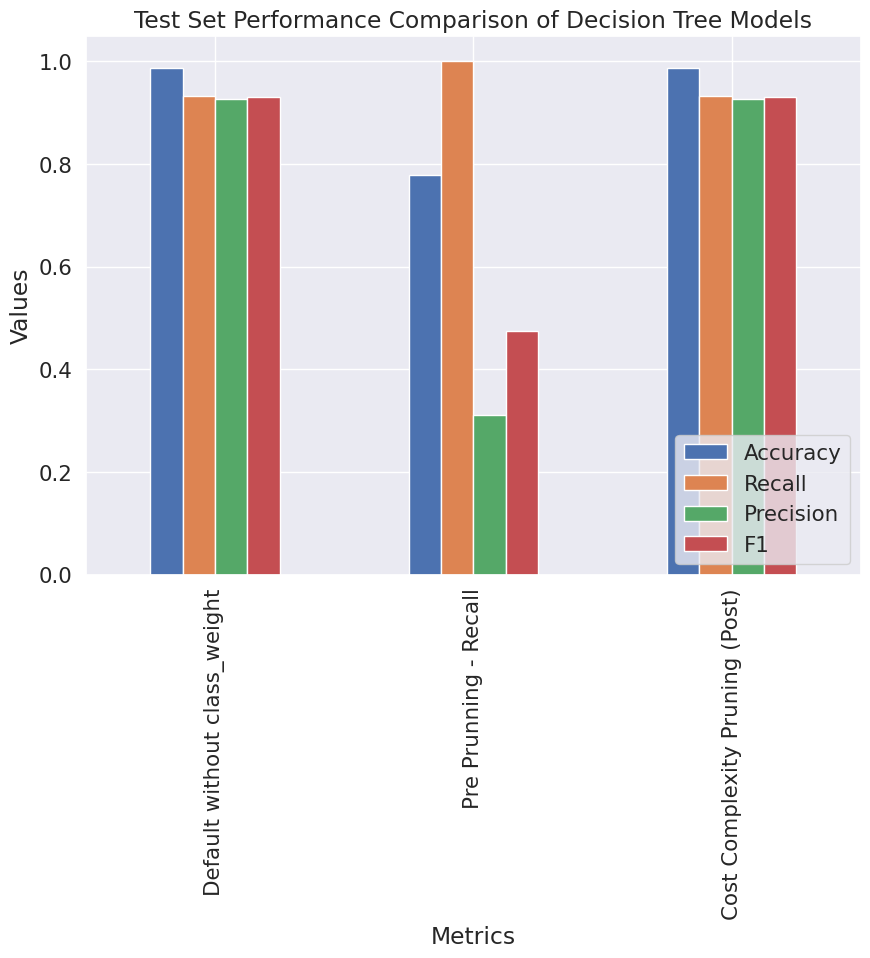

In [ ]:
# Model comparison plot

sns.set(font_scale=1.4)
models_test_comp_df.T.plot(kind="bar", figsize=(10, 7))
plt.title("Test Set Performance Comparison of Decision Tree Models")
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.legend(loc="lower right")
plt.show()


## <a name="insightrec">Actionable Insights and Business Recommendations</a>


**Insights**

* Overall, people with higher income, more family members, higher amounts of credit card debt and higher levels of education are more likely to purchase loans.  

*  Suprisingly Age and Mortgage balance did not have a large influence on the model.  

*  For the selected model, CreditCard and zipcodes starting with 92, 95 and 96 had no influence on the model.

*  Mortage balance, Online access, and having a Securities Account had very small influences on the model.  

*  Zipcodes starting with 93 and 94 had more influence on the model, but only in conjuction with other factors.

* The model shows that customers with incomes 81.5k or less are overall less likely to purchase a loan.

**Recommendations**

* Use the Full Decison Tree model for predicting likelyhood customer will purchase a loan.

*  Customers with income of 116.5k and above and over 2.5 family members are more likley to purchase loans.  Start marketing to these customers and take a phased approach to begin marketing to customers that have more complex decision tree rules/features.  

*  Customers with income between 92.5K and 116.5K, with more than 2.5 family members, less than or equal to 57.5 years of age, and have over 4.85K are more likely to purchase a loan. This is another group, to start campaigining to as the logic is relatively simple.  


* Focus on marketing to customers with higher incomes, higher amounts of credit card debt, higher levels of education (2 and 3), and higher number of family members.  Customers that have this profile are predicted to purchase loans more often.  

*  Only 10.4% of customers have a Security Account with the bank and only 6% have a CD Account.  
      *  Reuse this data to create  Decision Tree models that predicts customers that are likely to open Security and CD Accounts, and use the model results to target these customers.    


* Contiue to evaluate models its performance on future unseen data, and tune as needed.  



  

# <a name="appen">Appendix</a>

___

## <a name="zipeval">Zip code evaluation with uszipcode package</a>

In [ ]:
search = SearchEngine()

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [ ]:
search.by_zipcode(91107).major_city

'Pasadena'

There are 244 unique cities.  This would create a large amount of dummy variables, so will use first two characters of the US ZipCode instead.  

In [ ]:
# loop through ZIPCode column and use SearchEngine method to covert ZIPCode to city
# Check to see how many unique cities

city_list = []
#for zipcode in dfmodel["ZIPCode"].head(100):

for i, zipcode in enumerate(df["ZIPCode"].unique()):
  #city = search.by_zipcode(zipcode)

  if(zipcode =='92717'):
    city_list.append("Irvine")
  elif(zipcode == '93077'):
    city_list.append("Ventura")
  elif(zipcode == '92634'):
    city_list.append("Fullerton")
  elif(zipcode == '96651'):
    city_list.append("Lotus")
  else:
    #print(zipcode)
    try:
      city = search.by_zipcode(zipcode).major_city
      city_list.append(city)
    except:
      print(zipcode)


len(set(city_list))


92717
93077
92634
96651


244

In [ ]:
def get_county(zipcode):
  from uszipcode import SearchEngine
  sr = SearchEngine()
  z = sr.by_zipcode(zipcode)
  sr.close()
  if z is not None:
    return z.county
  else:
    return 'None'

In [ ]:
sr = SearchEngine()
countylist = []
#for zipcode in dfmodel["ZIPCode"].head(100):

for i, zipcode in enumerate(df["ZIPCode"].unique()):
  county = get_county(str((df['ZIPCode'][i])))
  countylist.append(county)

In [ ]:
len(set(countylist))

29

There are 29 unique counties in the dataset.  Will use 2 digit prefix for zip codes.  

## <a name="dTree">Full Decision Tree Model Visualization</a>


<a href="#dmodel">Back to model</a>

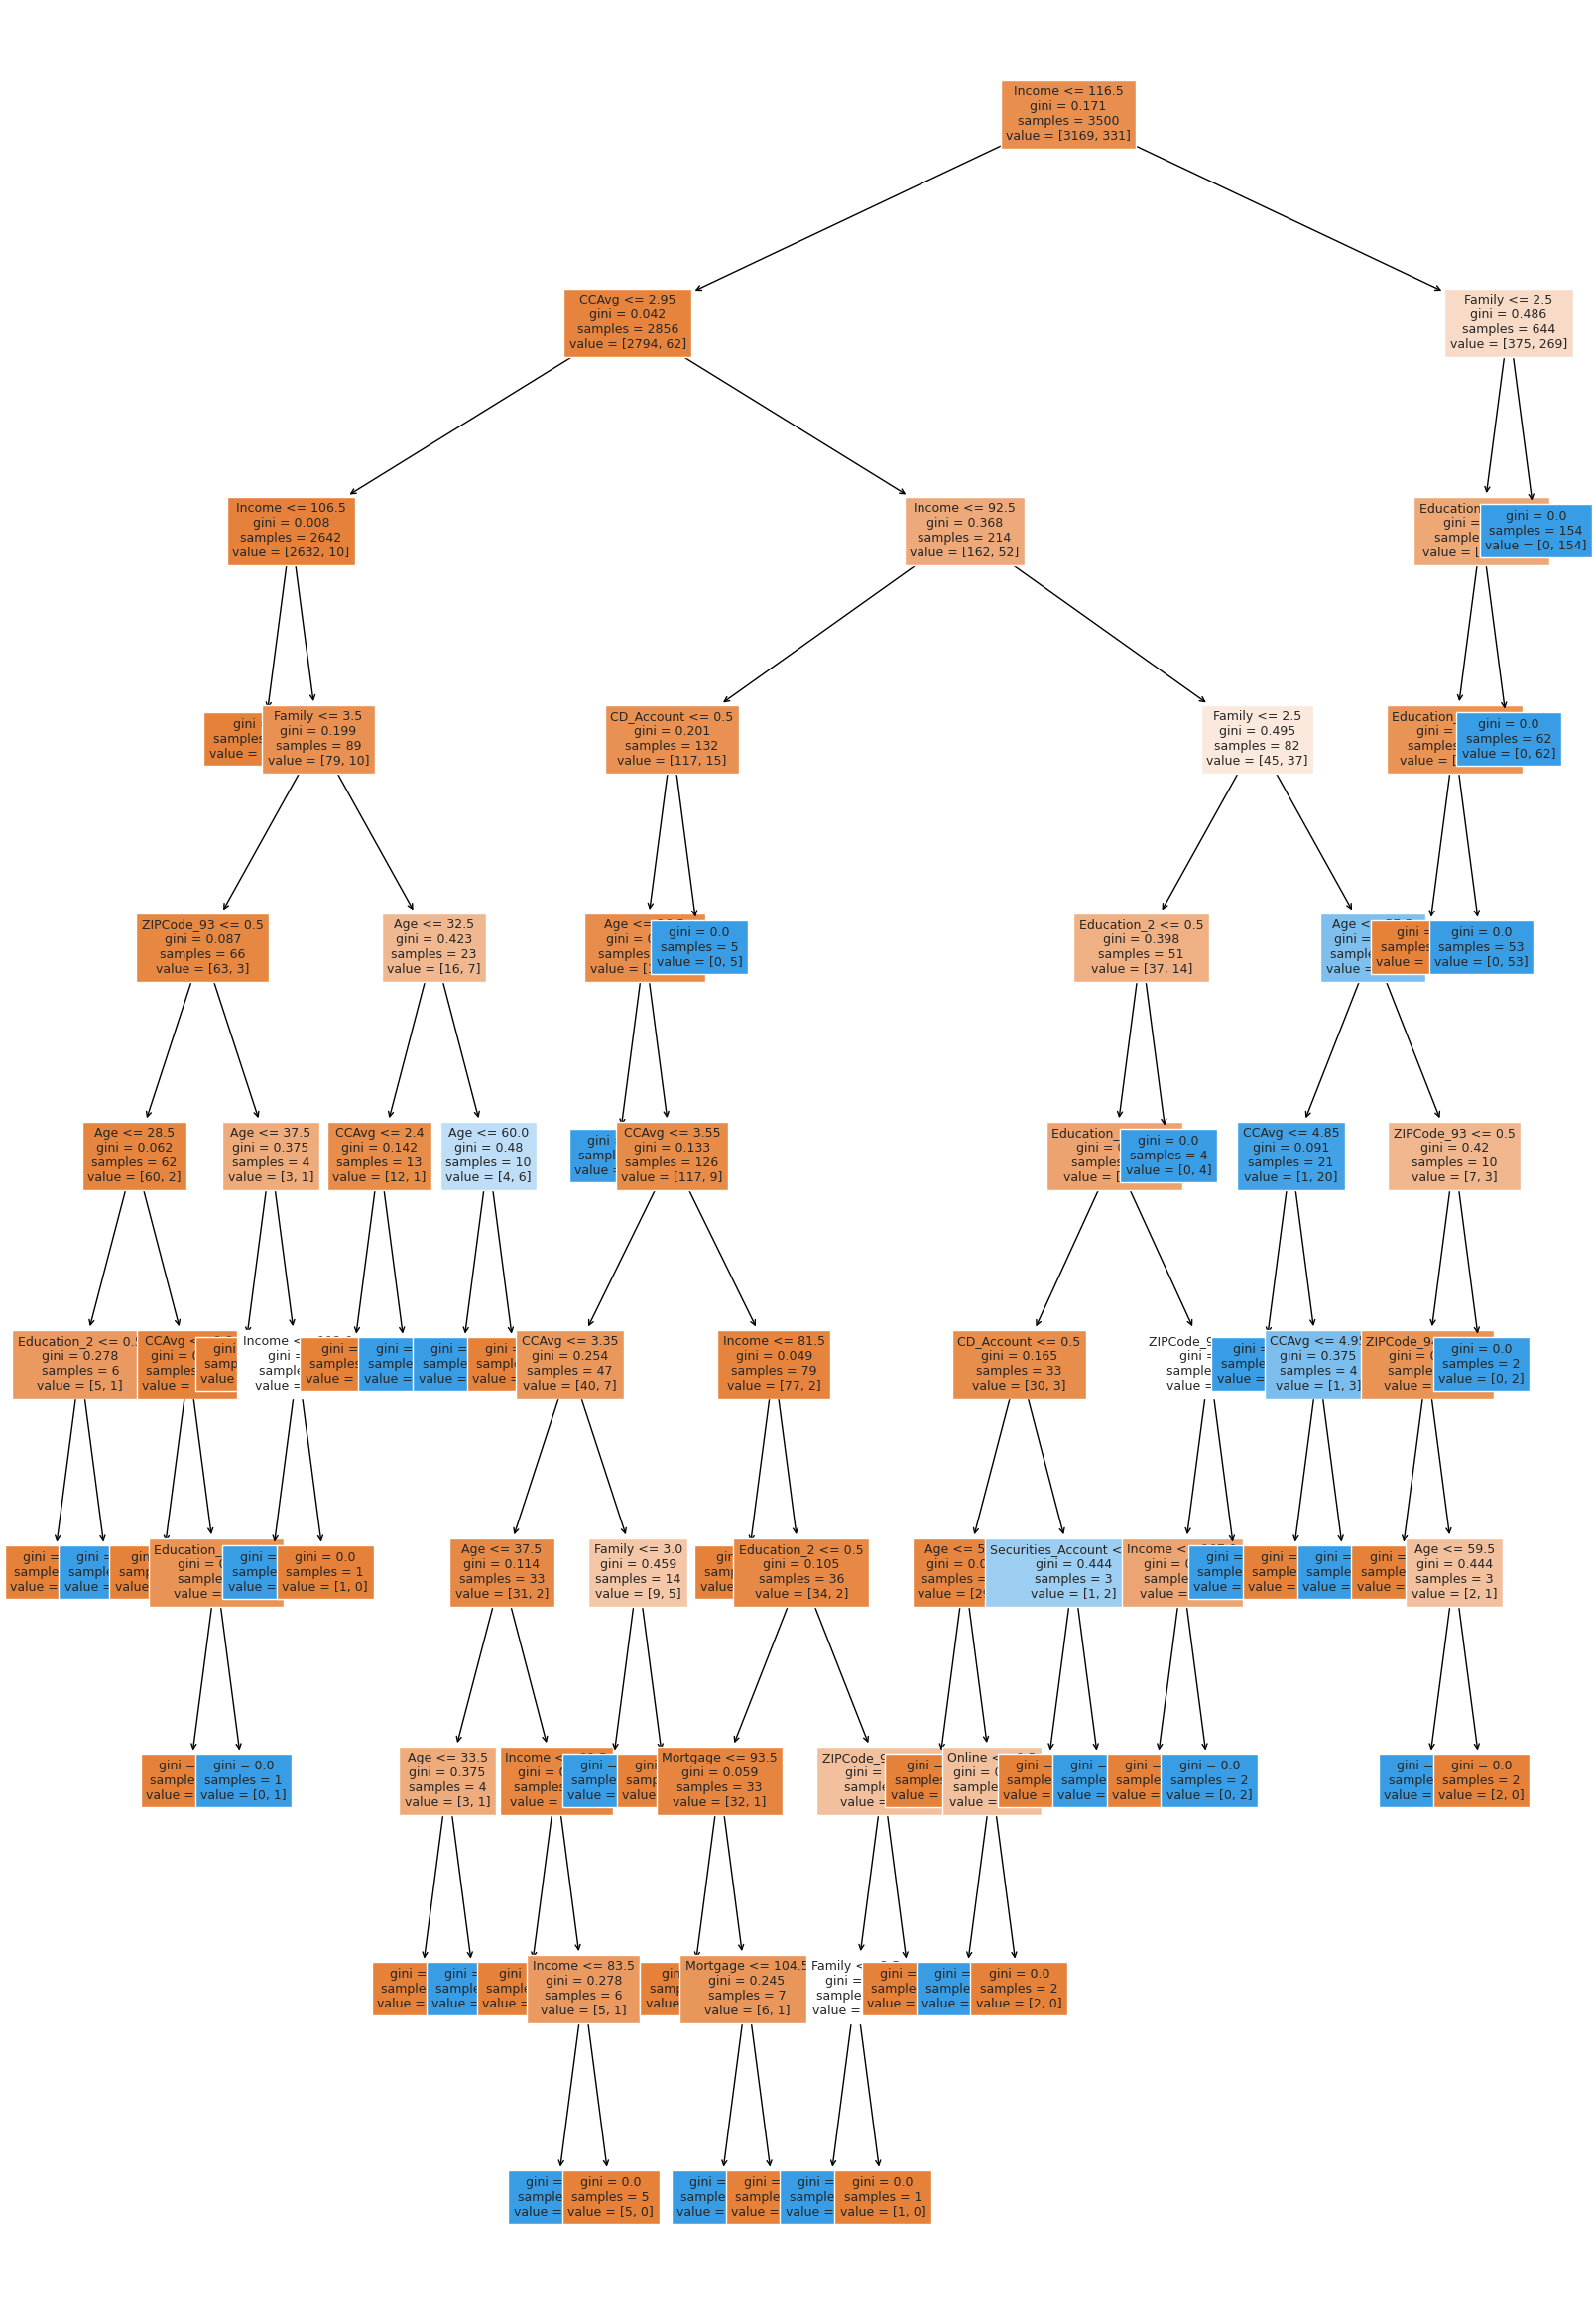

In [ ]:
# Visualize the decision tree for the Default model
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    modelD,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

## <a name="hyperTree">Hyperparameter Pruned Decision Tree Model Visualization</a>


<a href="#preprunevisualrules">Back to model</a>

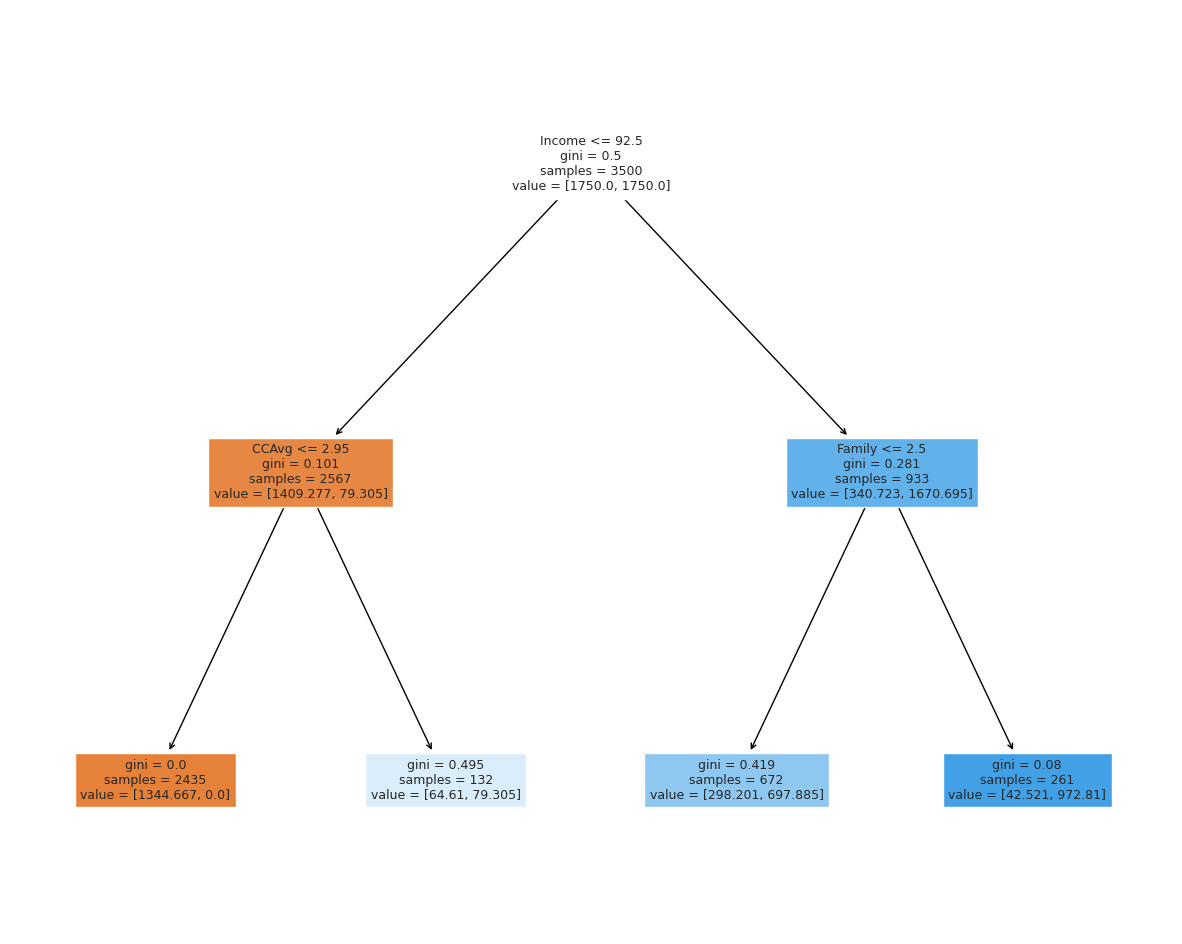

In [ ]:
# Visualize the decision tree for the Pre Pruned tredd
plt.figure(figsize=(15, 12))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

<a href="#preprunevisualrules">Back to model</a>

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

## <a name="custcomplextree">Cost Complexity Pruning Decision Tree Model Visualization</a>


<a href="#costcomplexvisual">Back to model</a>

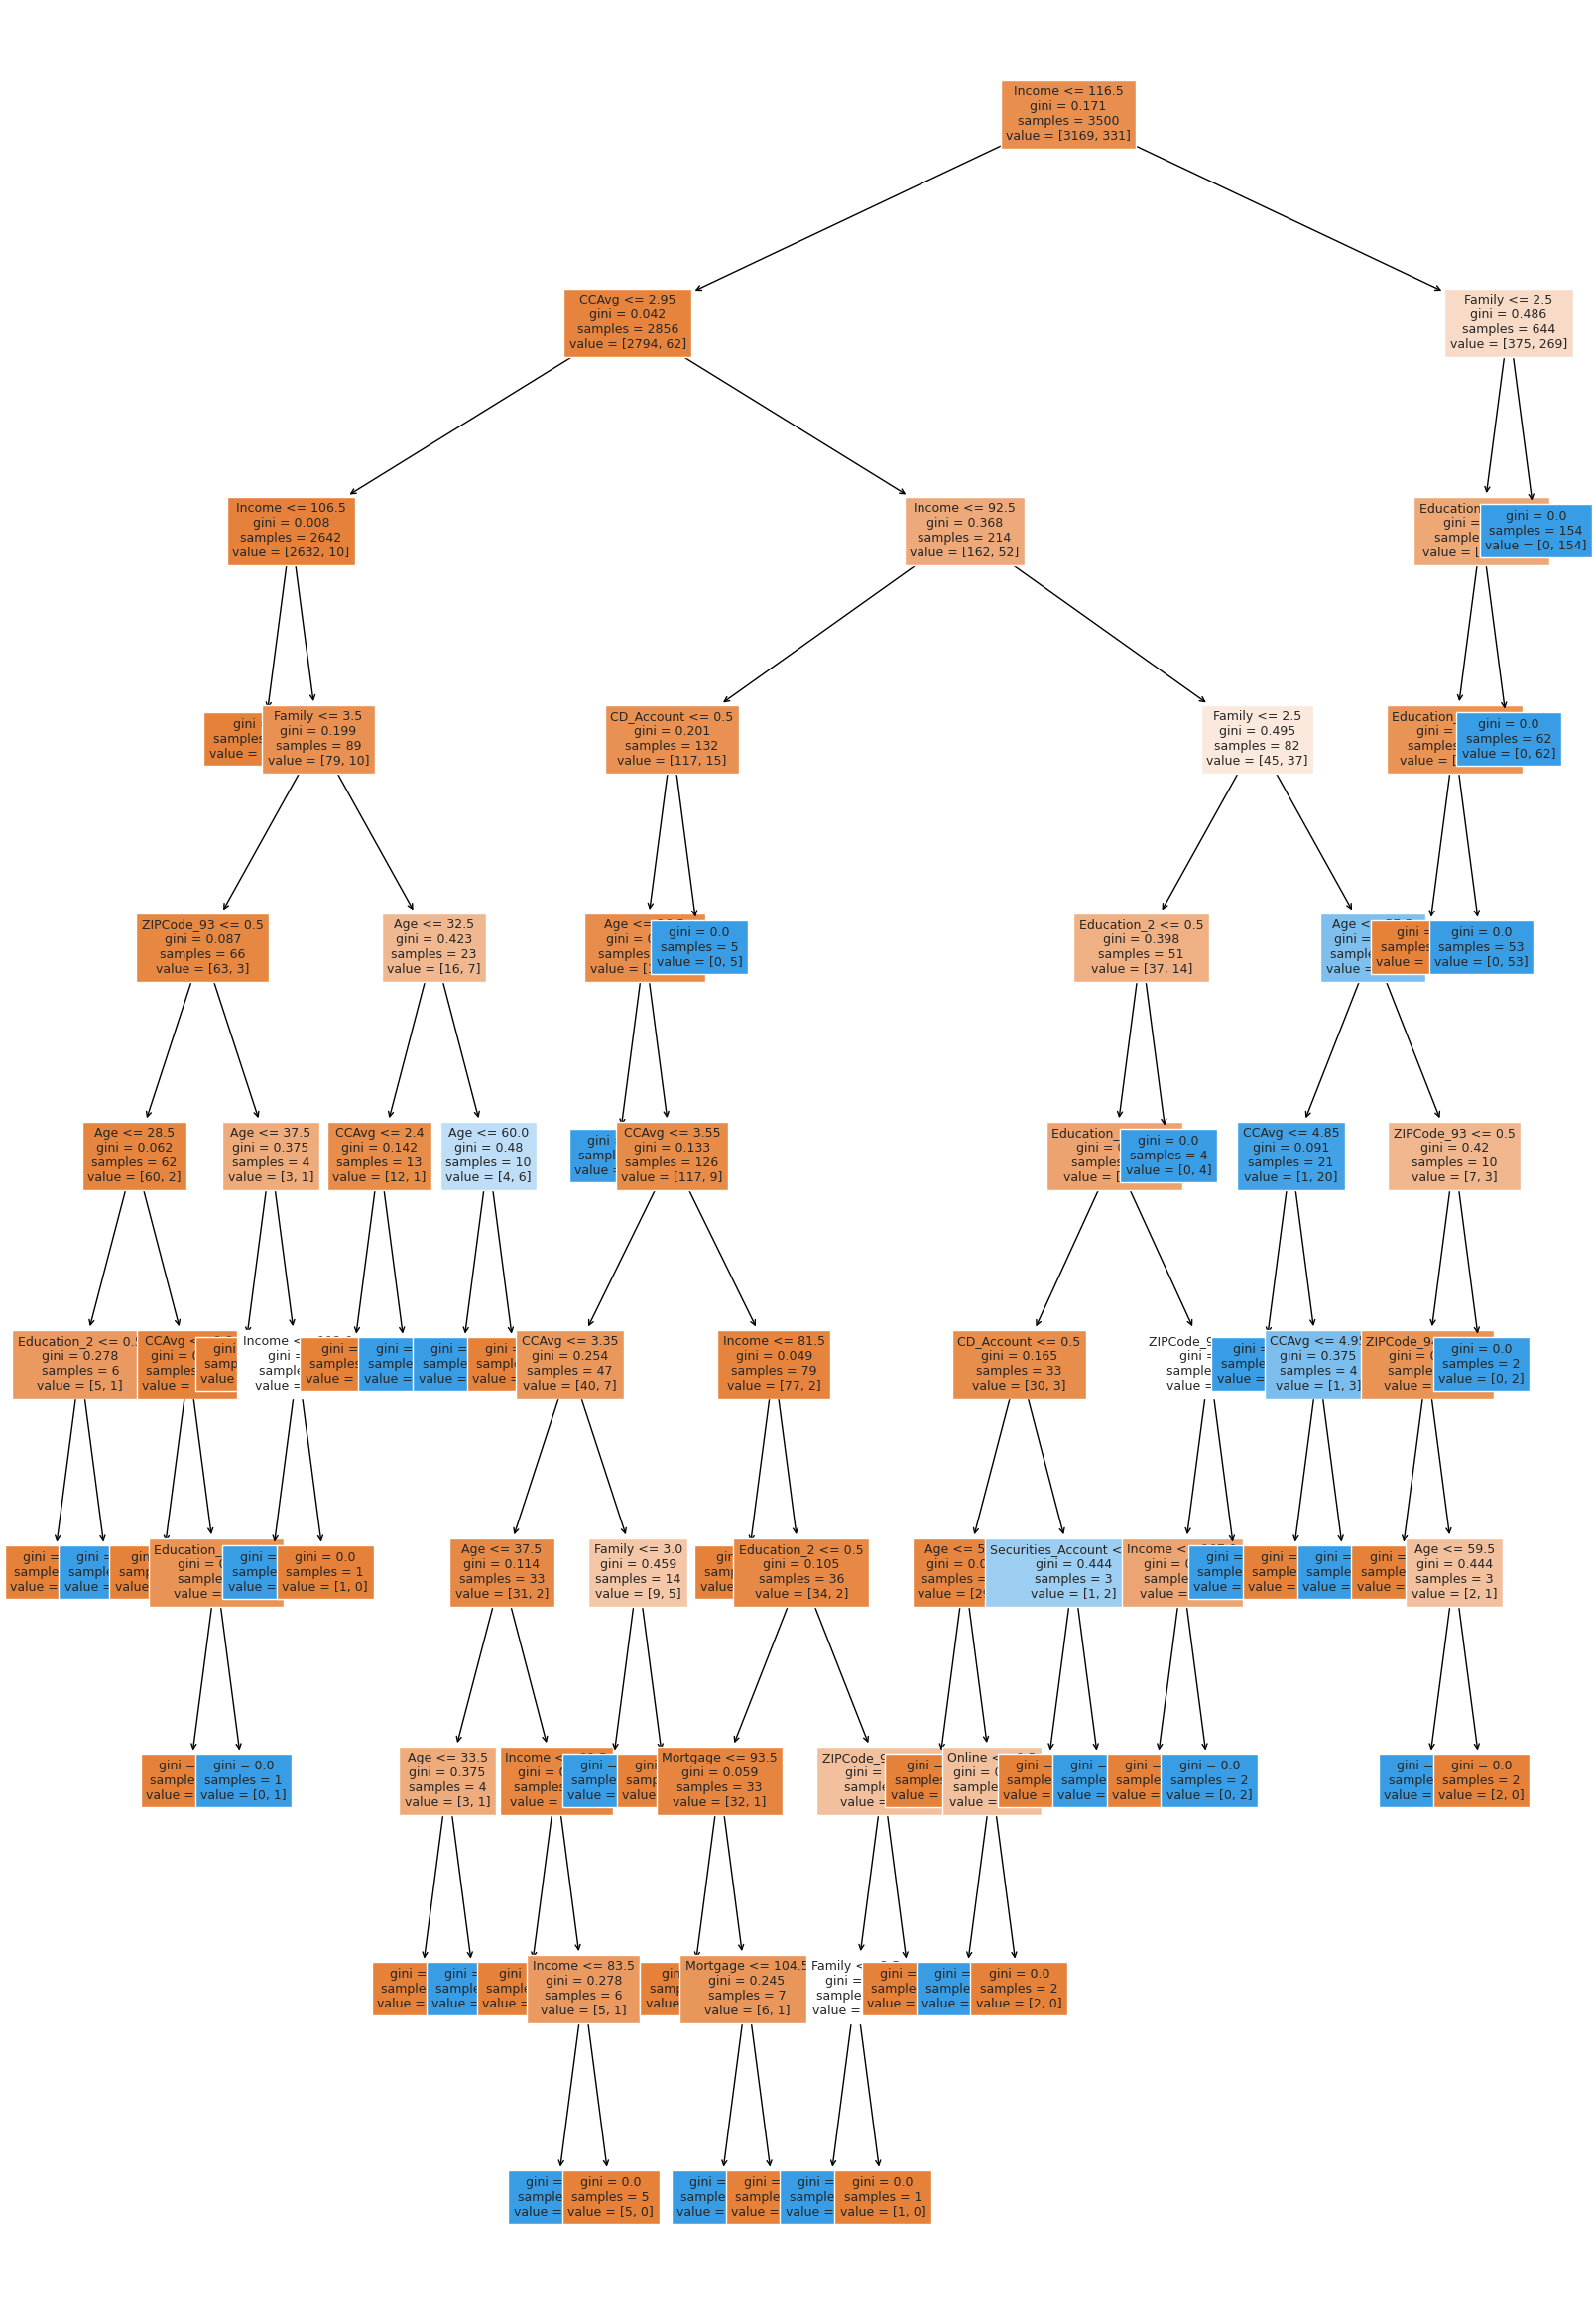

In [ ]:
# Visualize the decision tree for the Pre Pruned tredd
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()



<a href="#costcomplexvisual">Back to model</a>



<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

## <a name="other">Additional models evaluated</a>

### <a name="weights">Decision Tree with weights</a>



#### Default Decision Tree - No Pruning (with class_weights)

Another Decision Tree model was built, with class_weights="balanced."

The dataset has a significantly different number of data points for each class.

The Positive Class (Personal_Loan=1) only represents ~10% of the dataset.

<a href="#treeWeights">Back to previous section.</a>

In [ ]:
# create new DTree model with class_weight="balanced" parameter
modelDW = DecisionTreeClassifier(random_state=1, class_weight="balanced")
modelDW.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

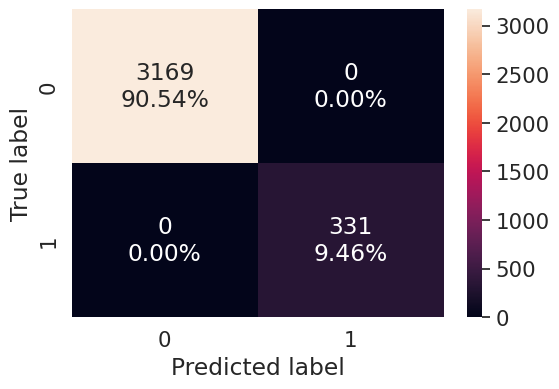

In [ ]:
# confusion maxtrix for balanced DTree

confusion_matrix_sklearn(modelDW, X_train, y_train)

In [ ]:
# Metrics for modelDW model training data


dTree_Weights_Default_Train = model_performance_classification_sklearn(modelDW, X_train, y_train)
dTree_Weights_Default_Train

,Accuracy,Recall,Precision,F1
0,1.00,1.00,1.00,1.00


#### Default Decision Tree - Test Data (With Weights)

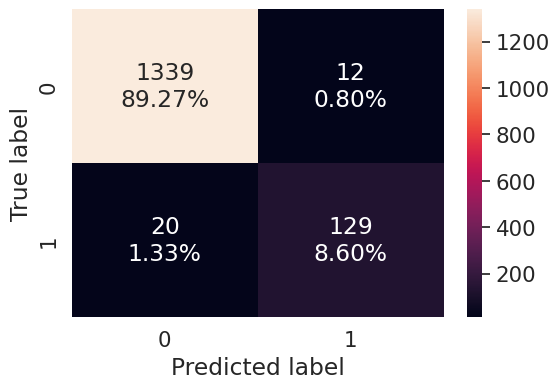

In [ ]:
# confusion maxtrix for balanced DTree on Test data


confusion_matrix_sklearn(modelDW, X_test, y_test)

In [ ]:
# Metrics for modelDW model test data


dTree_Weights_Default_Test = model_performance_classification_sklearn(
    modelDW, X_test, y_test
)
dTree_Weights_Default_Test

,Accuracy,Recall,Precision,F1
0,0.98,0.87,0.91,0.89


Text(0.5, 0, 'Relative Importance')

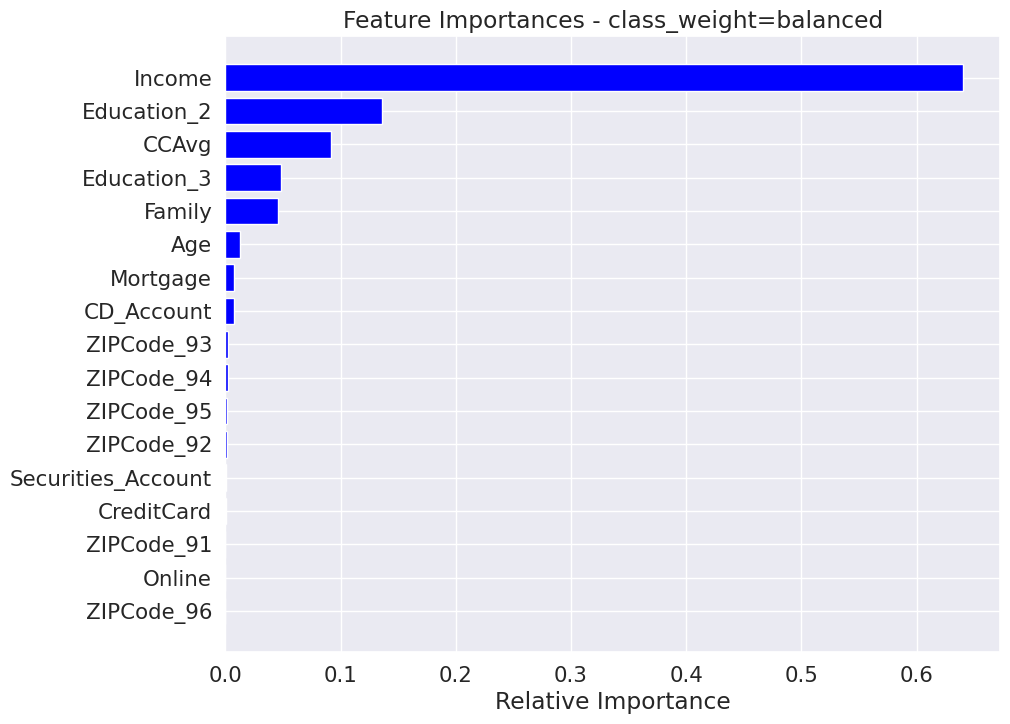

In [ ]:
importances = modelDW.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title("Feature Importances - class_weight=balanced")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")


#### Default Decision Tree Analysis - class_weight='balanced'


**Default Model w/ weights**

Since only 10% of the data had Personal_Loan=1, the parameter weight= balanced was added to the default model to see if we could improve the performace.  
The Recall for the test data, of the Decision Tree with class_weight=balanced, is 0.865772, which is a decrease from the decision tree that did not use class weights (0.932886). Accuracy, Precision and F1 also decreased, indicating the model without class weights performed best.  

<a href="#treeWeights">Back to previous section.</a>

<p style='text-align: right;'><a href="#TOC">Return to TOC</a></p>

In [ ]:
!pip install nbconvert
